<a href="https://colab.research.google.com/github/zpsy-hub/Data-Mining-Principles/blob/main/Data_Mining_Principles_MS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

In [2]:
# Load datasets
df_transaction = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 2/Data Mining Principles/cleaned data/Transaction_Data_cleaned.csv')
df_customer_feedback = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 2/Data Mining Principles/cleaned data/Customer_Feedback_Data_cleaned.csv')
df_product_offering = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 2/Data Mining Principles/cleaned data/Product_Offering_Data_cleaned.csv')

# Check data shapes
print("Transaction data shape:", df_transaction.shape)
print("Feedback data shape:", df_customer_feedback.shape)
print("Product data shape:", df_product_offering.shape)

Transaction data shape: (5000, 9)
Feedback data shape: (4959, 4)
Product data shape: (10, 7)


In [3]:
# Convert transaction date to datetime
df_transaction['Transaction_Date'] = pd.to_datetime(df_transaction['Transaction_Date'])

# Display data samples
print("\nTransaction Data Sample:")
display(df_transaction.head())
print("\nFeedback Data Sample:")
display(df_customer_feedback.head())
print("\nProduct Offering Data Sample:")
display(df_product_offering.head())


Transaction Data Sample:


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Transaction_Amount_Category,Transaction_Frequency,Total_Spent,Avg_Transaction_Amount
0,1,393,2023-01-01 00:00:00,3472.000000,Purchase,High,7,22365.000000,3195.000000
1,2,826,2023-01-01 01:00:00,3736.422663,Bill Payment,Very High,3,8182.422663,2727.474221
2,3,916,2023-01-01 02:00:00,10.000000,Purchase,Low,9,18406.000000,2045.111111
3,4,109,2023-01-01 03:00:00,72.000000,Investment,Low,5,7492.000000,1498.400000
4,5,889,2023-01-01 04:00:00,1793.000000,Investment,Medium,3,6348.834015,2116.278005



Feedback Data Sample:


,Customer_ID,Satisfaction_Score,Likelihood_to_Recommend,Mapped_Satisfaction
0,1,10,9,Extremely Satisfied
1,2,3,3,Dissatisfied
2,3,10,1,Extremely Satisfied
3,4,7,4,Fairly Satisfied
4,5,8,7,Satisfied



Product Offering Data Sample:


,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Income_Group,Risk_Level_Encoded,Target_Income_Group_Encoded
0,1,Platinum Credit Card,Credit Card,Medium,Medium,2,2
1,2,Gold Savings Account,Savings Account,Low,Low,1,1
2,3,High-Yield Investment Account,Investment,High,High,3,3
3,4,Mortgage Loan,Loan,Medium,High,2,3
4,5,Auto Loan,Loan,Medium,Medium,2,2


# 2. Exploratory Data Analysis

In [4]:
# Summary statistics for each dataset
print("\nCustomer Feedback Summary Statistics:")
display(df_customer_feedback.describe())

print("\nProduct Offering Summary Statistics:")
display(df_product_offering.describe())

print("\nTransaction Summary Statistics:")
display(df_transaction.describe())


Customer Feedback Summary Statistics:


,Customer_ID,Satisfaction_Score,Likelihood_to_Recommend
count,4959.000000,4959.000000,4959.000000
mean,501.651543,5.599314,5.566848
std,288.793170,2.801948,2.867224
min,1.000000,1.000000,1.000000
25%,253.000000,3.000000,3.000000
50%,501.000000,6.000000,6.000000
75%,751.500000,8.000000,8.000000
max,1000.000000,10.000000,10.000000



Product Offering Summary Statistics:


,Product_ID,Risk_Level_Encoded,Target_Income_Group_Encoded
count,10.00000,10.000000,10.000000
mean,5.50000,2.000000,2.000000
std,3.02765,0.666667,0.816497
min,1.00000,1.000000,1.000000
25%,3.25000,2.000000,1.250000
50%,5.50000,2.000000,2.000000
75%,7.75000,2.000000,2.750000
max,10.00000,3.000000,3.000000



Transaction Summary Statistics:


,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Frequency,Total_Spent,Avg_Transaction_Amount
count,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,505.295400,2023-04-15 03:30:00,3103.231136,5.983200,18694.260584,3103.231136
min,1.000000,1.000000,2023-01-01 00:00:00,10.000000,1.000000,286.000000,286.000000
25%,1250.750000,252.000000,2023-02-22 01:45:00,1260.000000,4.000000,10346.000000,2053.580357
50%,2500.500000,509.000000,2023-04-15 03:30:00,2539.000000,6.000000,14359.000000,2489.200000
75%,3750.250000,765.250000,2023-06-06 05:15:00,3724.000000,7.000000,19378.763591,2897.372940
max,5000.000000,1000.000000,2023-07-28 07:00:00,480300.000000,13.000000,489516.000000,144144.000000
std,1443.520003,291.844284,NaN,14743.580770,2.198792,36542.510070,6426.741604


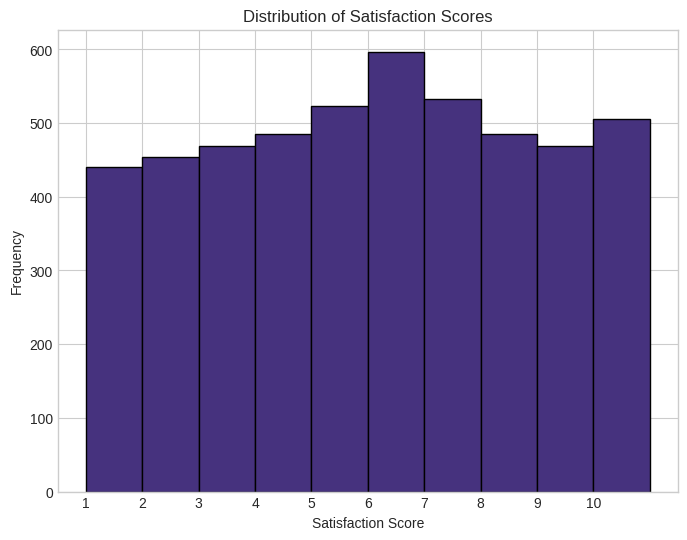

In [5]:
# Distribution of Satisfaction Scores
plt.figure(figsize=(8, 6))
plt.hist(df_customer_feedback['Satisfaction_Score'], bins=range(1, 12), edgecolor='black')
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))
plt.show()

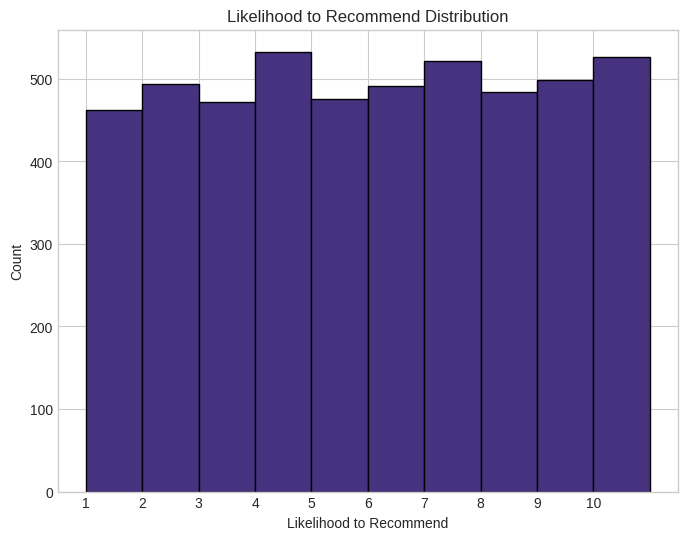

In [6]:
# Distribution of Likelihood to Recommend
plt.figure(figsize=(8, 6))
plt.hist(df_customer_feedback['Likelihood_to_Recommend'],
         bins=range(min(df_customer_feedback['Likelihood_to_Recommend']),
                 max(df_customer_feedback['Likelihood_to_Recommend']) + 2),
         edgecolor='black')
plt.title('Likelihood to Recommend Distribution')
plt.xlabel('Likelihood to Recommend')
plt.ylabel('Count')
plt.xticks(range(min(df_customer_feedback['Likelihood_to_Recommend']),
                max(df_customer_feedback['Likelihood_to_Recommend']) + 1))
plt.show()

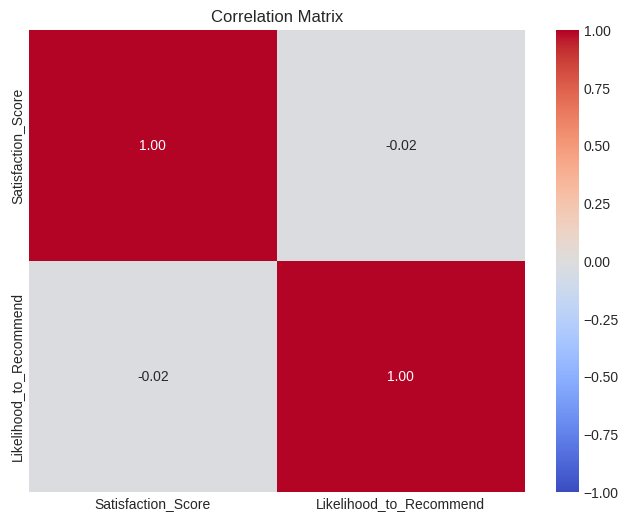

In [7]:
# Correlation between satisfaction metrics
correlation_matrix = df_customer_feedback[['Satisfaction_Score', 'Likelihood_to_Recommend']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

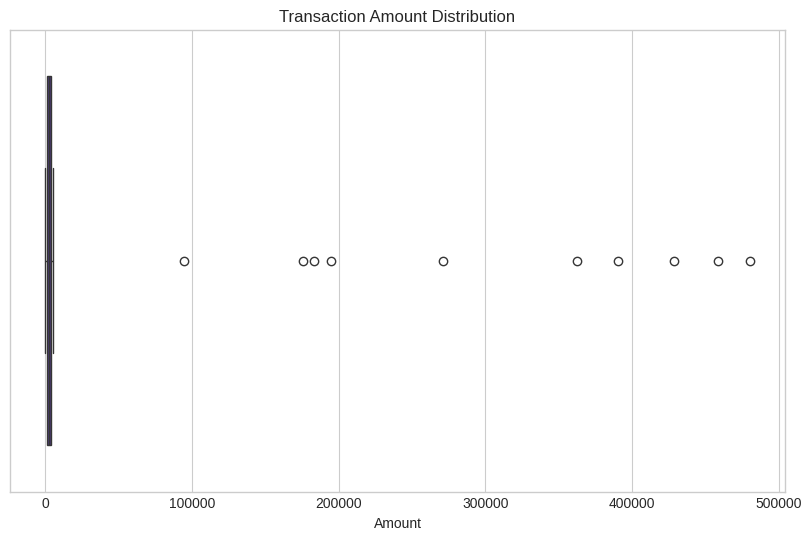

In [8]:
# Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_transaction['Transaction_Amount'])
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.show()

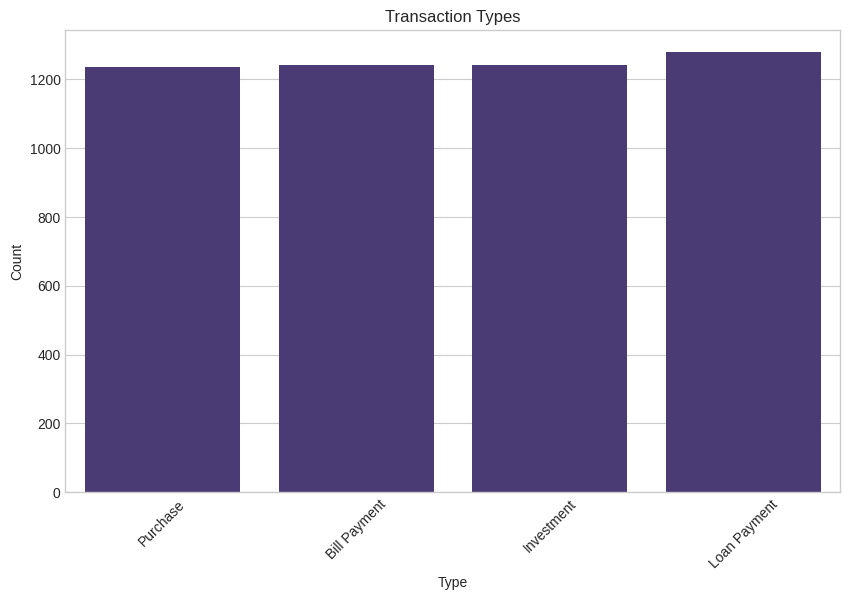

In [9]:
# Transaction types breakdown
plt.figure(figsize=(10, 6))
sns.countplot(x='Transaction_Type', data=df_transaction)
plt.title('Transaction Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 3. Feature Engineering

In [10]:
# Create customer-level aggregated features
# Get unique customers
unique_customers = df_transaction['Customer_ID'].unique()
customer_features = pd.DataFrame({'Customer_ID': unique_customers})

# Transaction amount metrics
transaction_amount = df_transaction.groupby('Customer_ID')['Transaction_Amount'].agg(
    ['sum', 'count', 'mean', 'min', 'max']).reset_index()
transaction_amount.columns = ['Customer_ID', 'Total_Transaction_Amount',
                             'Transaction_Count', 'Avg_Transaction_Amount',
                             'Min_Transaction_Amount', 'Max_Transaction_Amount']

# Transaction types
transaction_types = pd.crosstab(
    df_transaction['Customer_ID'],
    df_transaction['Transaction_Type'],
    normalize='index'
).reset_index()

# Transaction amount categories
transaction_categories = pd.crosstab(
    df_transaction['Customer_ID'],
    df_transaction['Transaction_Amount_Category'],
    normalize='index'
).reset_index()

# Feedback metrics
feedback_metrics = df_customer_feedback.groupby('Customer_ID').agg(
    Feedback_Count=('Satisfaction_Score', 'count'),
    Avg_Satisfaction=('Satisfaction_Score', 'mean'),
    Avg_Recommendation=('Likelihood_to_Recommend', 'mean')
).reset_index()

# Merge features
customer_features = customer_features.merge(transaction_amount, on='Customer_ID', how='left')
customer_features = customer_features.merge(transaction_types, on='Customer_ID', how='left')
customer_features = customer_features.merge(transaction_categories, on='Customer_ID', how='left')
customer_features = customer_features.merge(feedback_metrics, on='Customer_ID', how='left')

# Add recency feature
last_transaction_date = df_transaction.groupby('Customer_ID')['Transaction_Date'].max().reset_index()
last_transaction_date.columns = ['Customer_ID', 'Last_Transaction_Date']
max_date = pd.Timestamp('2023-07-31')
last_transaction_date['Days_Since_Last_Transaction'] = (
    max_date - last_transaction_date['Last_Transaction_Date']
).dt.days
customer_features = customer_features.merge(
    last_transaction_date[['Customer_ID', 'Days_Since_Last_Transaction']],
    on='Customer_ID', how='left'
)

# Is repeat customer?
customer_features['Is_Repeat_Customer'] = customer_features['Transaction_Count'] > 1

# Fill NaNs
customer_features = customer_features.fillna(0)

# Create engagement score
customer_features['Engagement_Score'] = (
    (customer_features['Transaction_Count'] / customer_features['Transaction_Count'].max()) * 0.7 +
    (customer_features['Feedback_Count'] / customer_features['Feedback_Count'].max()) * 0.3
) * 10

# Create customer value score
customer_features['Customer_Value'] = (
    (customer_features['Total_Transaction_Amount'] / customer_features['Total_Transaction_Amount'].max()) * 0.8 +
    (customer_features['Transaction_Count'] / customer_features['Transaction_Count'].max()) * 0.2
) * 10

## 4. RFM Feature Creation

# Calculate RFM (Recency, Frequency, Monetary) metrics
rfm = customer_features[['Customer_ID', 'Days_Since_Last_Transaction', 'Transaction_Count', 'Total_Transaction_Amount']].copy()
rfm.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']

# Convert recency to a score where lower is better
rfm['Recency'] = rfm['Recency'].max() - rfm['Recency']

# Create quartiles
rfm['R_Quartile'] = pd.qcut(rfm['Recency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm['F_Quartile'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm['M_Quartile'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# Convert to integers
rfm['R_Quartile'] = rfm['R_Quartile'].astype(int)
rfm['F_Quartile'] = rfm['F_Quartile'].astype(int)
rfm['M_Quartile'] = rfm['M_Quartile'].astype(int)

# RFM Score
rfm['RFM_Score'] = rfm['R_Quartile'] + rfm['F_Quartile'] + rfm['M_Quartile']

# Merge RFM metrics back to customer features
customer_features = customer_features.merge(
    rfm[['Customer_ID', 'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFM_Score']],
    on='Customer_ID', how='left'
)

# Display the first few rows of the enriched customer data
print("\nEnriched Customer Features:")
display(customer_features.head())



Enriched Customer Features:


,Customer_ID,Total_Transaction_Amount,Transaction_Count,Avg_Transaction_Amount,Min_Transaction_Amount,Max_Transaction_Amount,Bill Payment,Investment,Loan Payment,Purchase,...,Avg_Satisfaction,Avg_Recommendation,Days_Since_Last_Transaction,Is_Repeat_Customer,Engagement_Score,Customer_Value,R_Quartile,F_Quartile,M_Quartile,RFM_Score
0,393,22365.000000,7,3195.000000,1535.0,4968.000000,0.428571,0.428571,0.000000,0.142857,...,1.000000,3.0,7,True,4.000000,1.442427,4,4,4,12
1,826,8182.422663,3,2727.474221,323.0,4123.000000,0.333333,0.000000,0.333333,0.333333,...,6.166667,5.5,15,True,3.000000,0.595261,3,1,2,6
2,916,18406.000000,9,2045.111111,10.0,4616.000000,0.333333,0.111111,0.333333,0.222222,...,2.714286,5.0,34,True,6.461538,1.685419,2,4,4,10
3,109,7492.000000,5,1498.400000,72.0,4549.000000,0.200000,0.400000,0.200000,0.200000,...,3.000000,7.0,77,True,3.384615,0.891670,1,2,1,4
4,889,6348.834015,3,2116.278005,1531.0,3024.834015,0.000000,1.000000,0.000000,0.000000,...,5.000000,5.6,108,True,2.769231,0.565295,1,1,1,3


# 5. Clustering Preparation

Using 19 features for clustering: ['Total_Transaction_Amount', 'Transaction_Count', 'Avg_Transaction_Amount', 'Bill Payment', 'Investment', 'Loan Payment', 'Purchase', 'Low', 'Medium', 'High', 'Very High', 'Avg_Satisfaction', 'Avg_Recommendation', 'Days_Since_Last_Transaction', 'Engagement_Score', 'Customer_Value', 'R_Quartile', 'F_Quartile', 'M_Quartile']
PCA variance explained: PC1=0.25, PC2=0.12


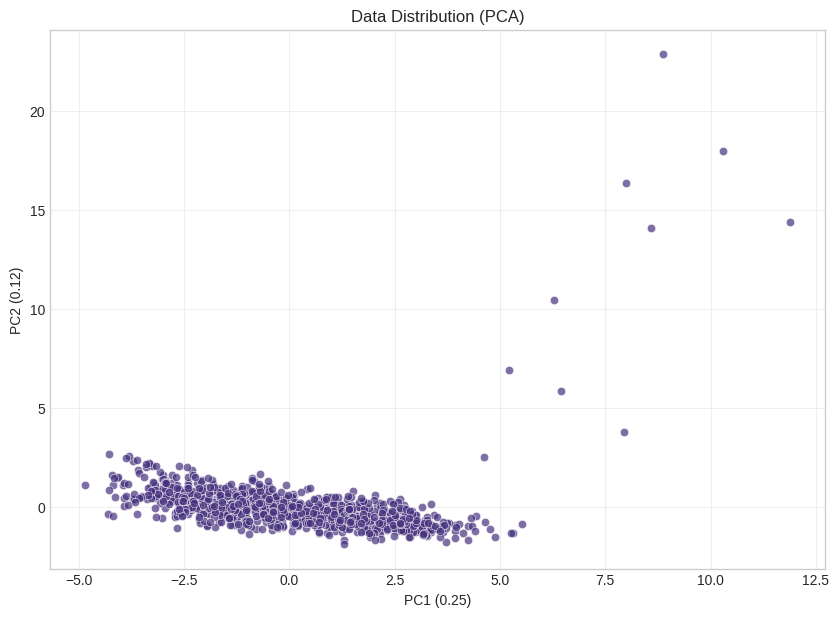

In [11]:
# Select features for clustering
clustering_features = [
    'Total_Transaction_Amount', 'Transaction_Count', 'Avg_Transaction_Amount',
    'Bill Payment', 'Investment', 'Loan Payment', 'Purchase', # Transaction type percentages
    'Low', 'Medium', 'High', 'Very High', # Transaction amount categories
    'Avg_Satisfaction', 'Avg_Recommendation',
    'Days_Since_Last_Transaction', 'Engagement_Score', 'Customer_Value',
    'R_Quartile', 'F_Quartile', 'M_Quartile'
]

# Make sure all features exist in the dataframe
clustering_features = [f for f in clustering_features if f in customer_features.columns]
print(f"Using {len(clustering_features)} features for clustering: {clustering_features}")

# Create a subset for clustering
cluster_data = customer_features[clustering_features].copy()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(f"PCA variance explained: PC1={pca.explained_variance_ratio_[0]:.2f}, PC2={pca.explained_variance_ratio_[1]:.2f}")

# Visualize data before clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pc_df, alpha=0.7)
plt.title('Data Distribution (PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f})')
plt.grid(True, alpha=0.3)
plt.show()


# 6. Finding Optimal Number of Clusters

k=2: Silhouette Score=0.161, Inertia=15704
k=3: Silhouette Score=0.165, Inertia=13617
k=4: Silhouette Score=0.111, Inertia=12694
k=5: Silhouette Score=0.098, Inertia=12039
k=6: Silhouette Score=0.105, Inertia=11447
k=7: Silhouette Score=0.105, Inertia=11022
k=8: Silhouette Score=0.101, Inertia=10672


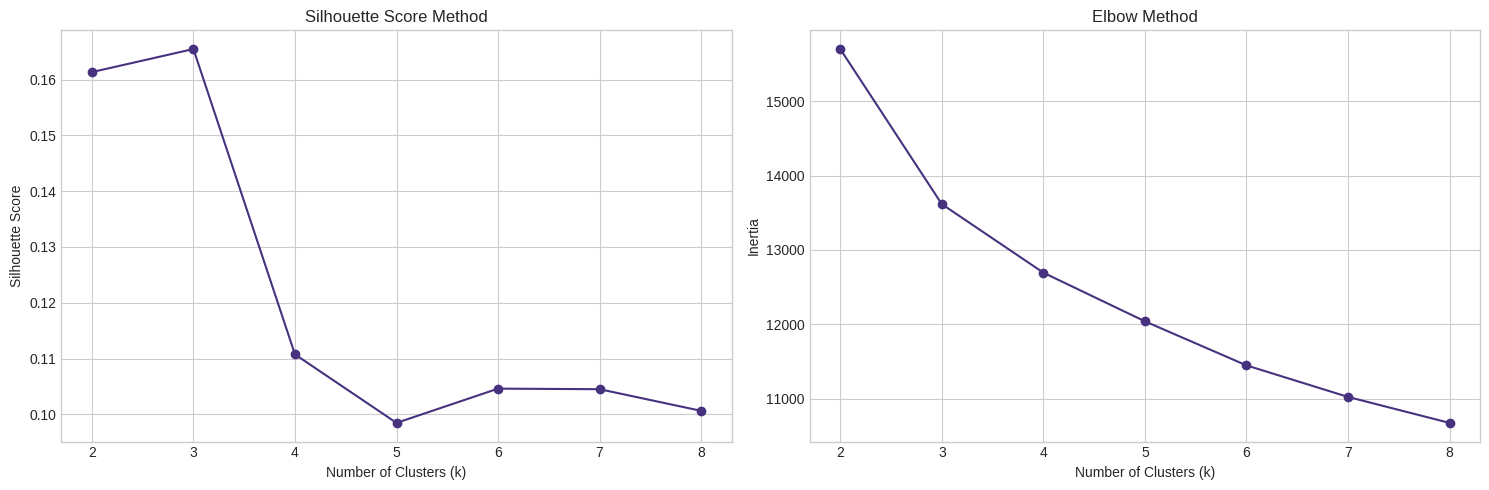


Best number of clusters based on silhouette score: 3


In [12]:
# Calculate silhouette scores and inertia for different k values
silhouette_scores = []
inertia_values = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_data, labels))
    inertia_values.append(kmeans.inertia_)
    print(f"k={k}: Silhouette Score={silhouette_scores[-1]:.3f}, Inertia={inertia_values[-1]:.0f}")

# Plot silhouette scores and inertia
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, 'o-')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, inertia_values, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.tight_layout()
plt.show()

# Determine best k value based on silhouette score
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\nBest number of clusters based on silhouette score: {best_k}")

# 7. K-means Clustering


K=3: Silhouette Score=0.165
K=4: Silhouette Score=0.111
K=5: Silhouette Score=0.098


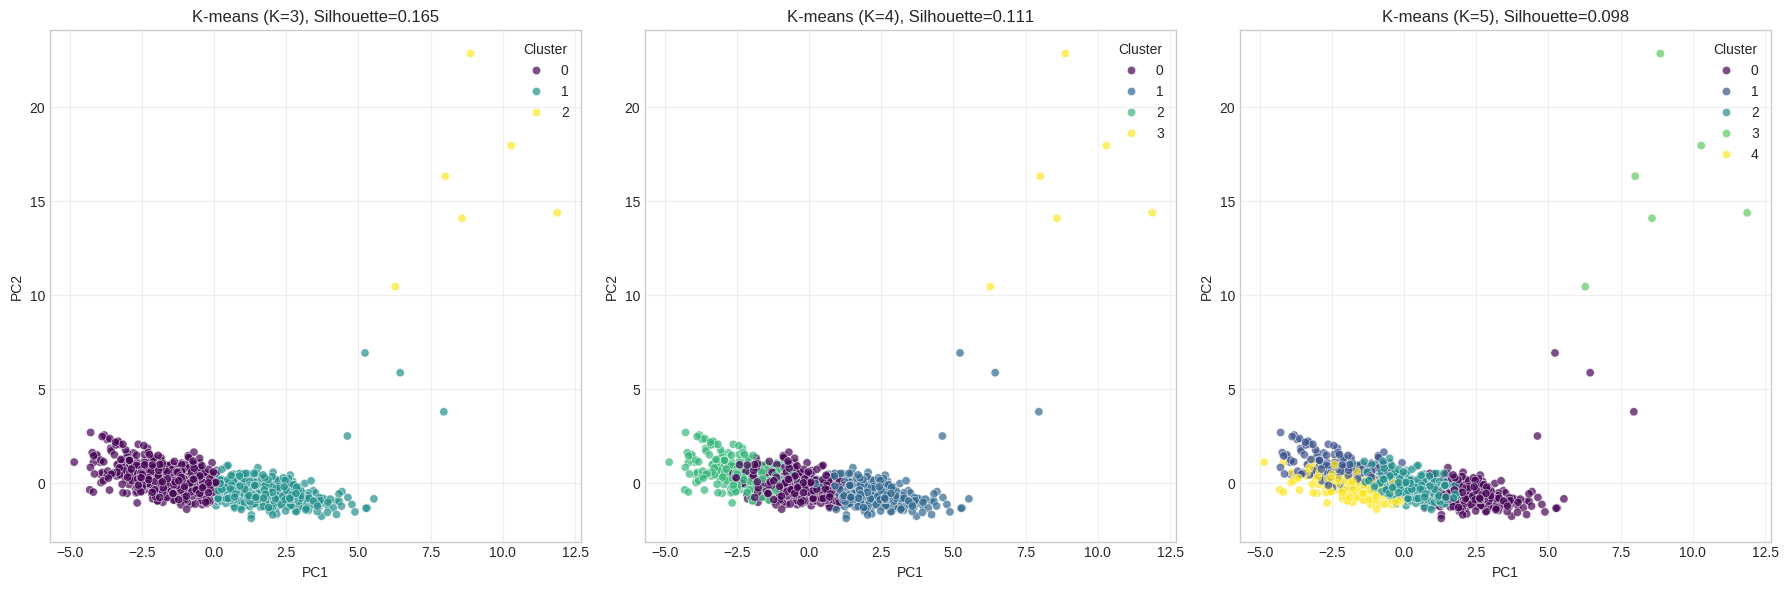

In [13]:
# Create multiple K-means models with different numbers of clusters
k_values = [3, 4, 5]  # Testing with 3, 4, and 5 clusters
kmeans_models = {}
silhouette_values = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    kmeans_models[k] = labels
    silhouette_values[k] = silhouette_score(scaled_data, labels)
    print(f"K={k}: Silhouette Score={silhouette_values[k]:.3f}")

# Visualize the clusters for different k values
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, k in enumerate(k_values):
    # Add cluster labels to PCA data
    pc_k = pc_df.copy()
    pc_k['Cluster'] = kmeans_models[k]

    # Create scatter plot
    sns.scatterplot(
        x='PC1', y='PC2',
        hue='Cluster',
        data=pc_k,
        palette='viridis',
        alpha=0.7,
        ax=axes[i]
    )
    axes[i].set_title(f'K-means (K={k}), Silhouette={silhouette_values[k]:.3f}')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. Analyzing the Selected Cluster Solution (K=4)

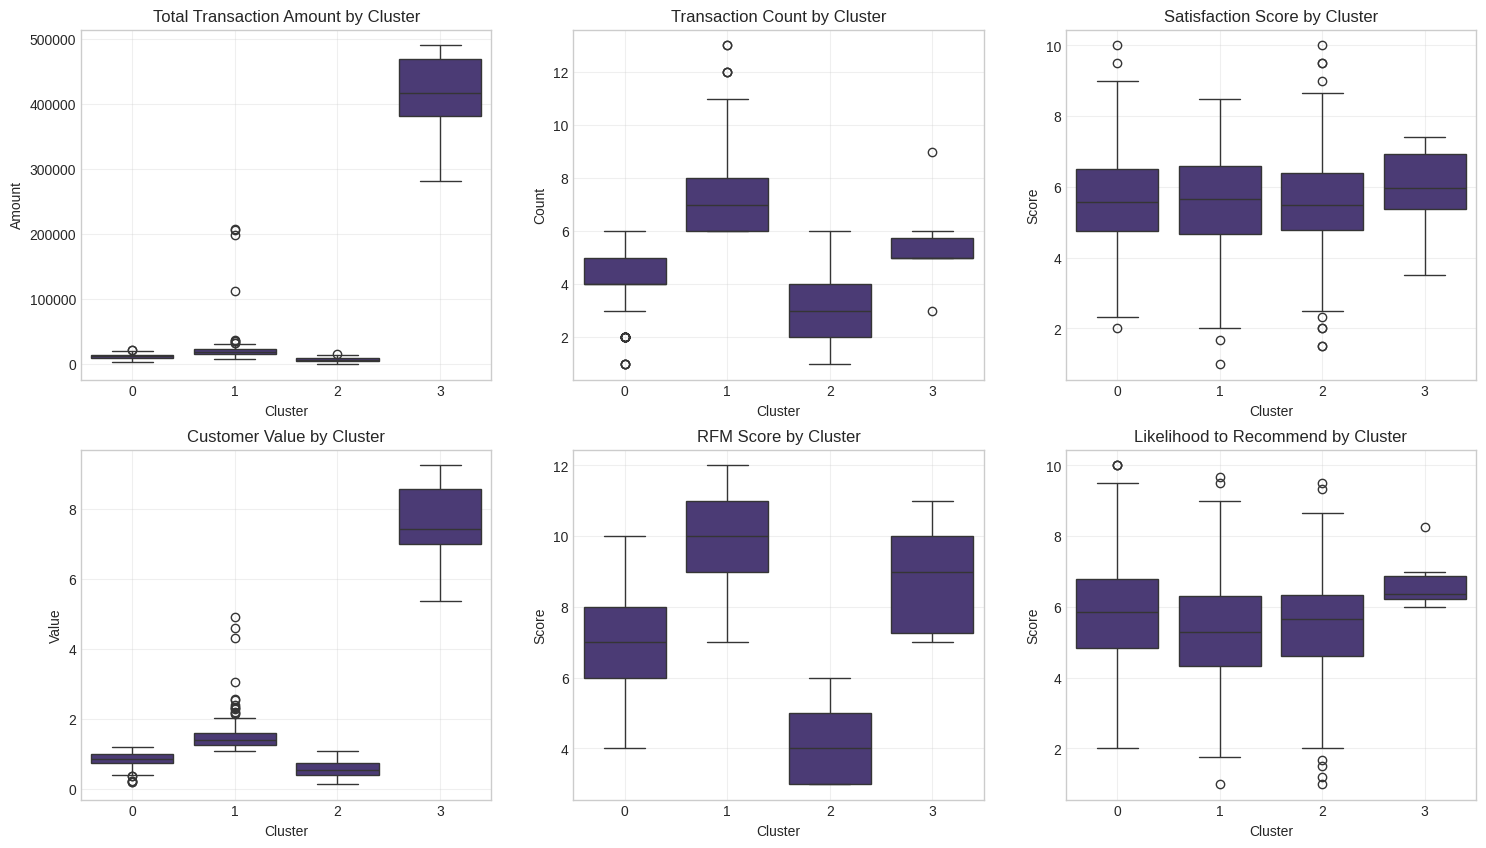

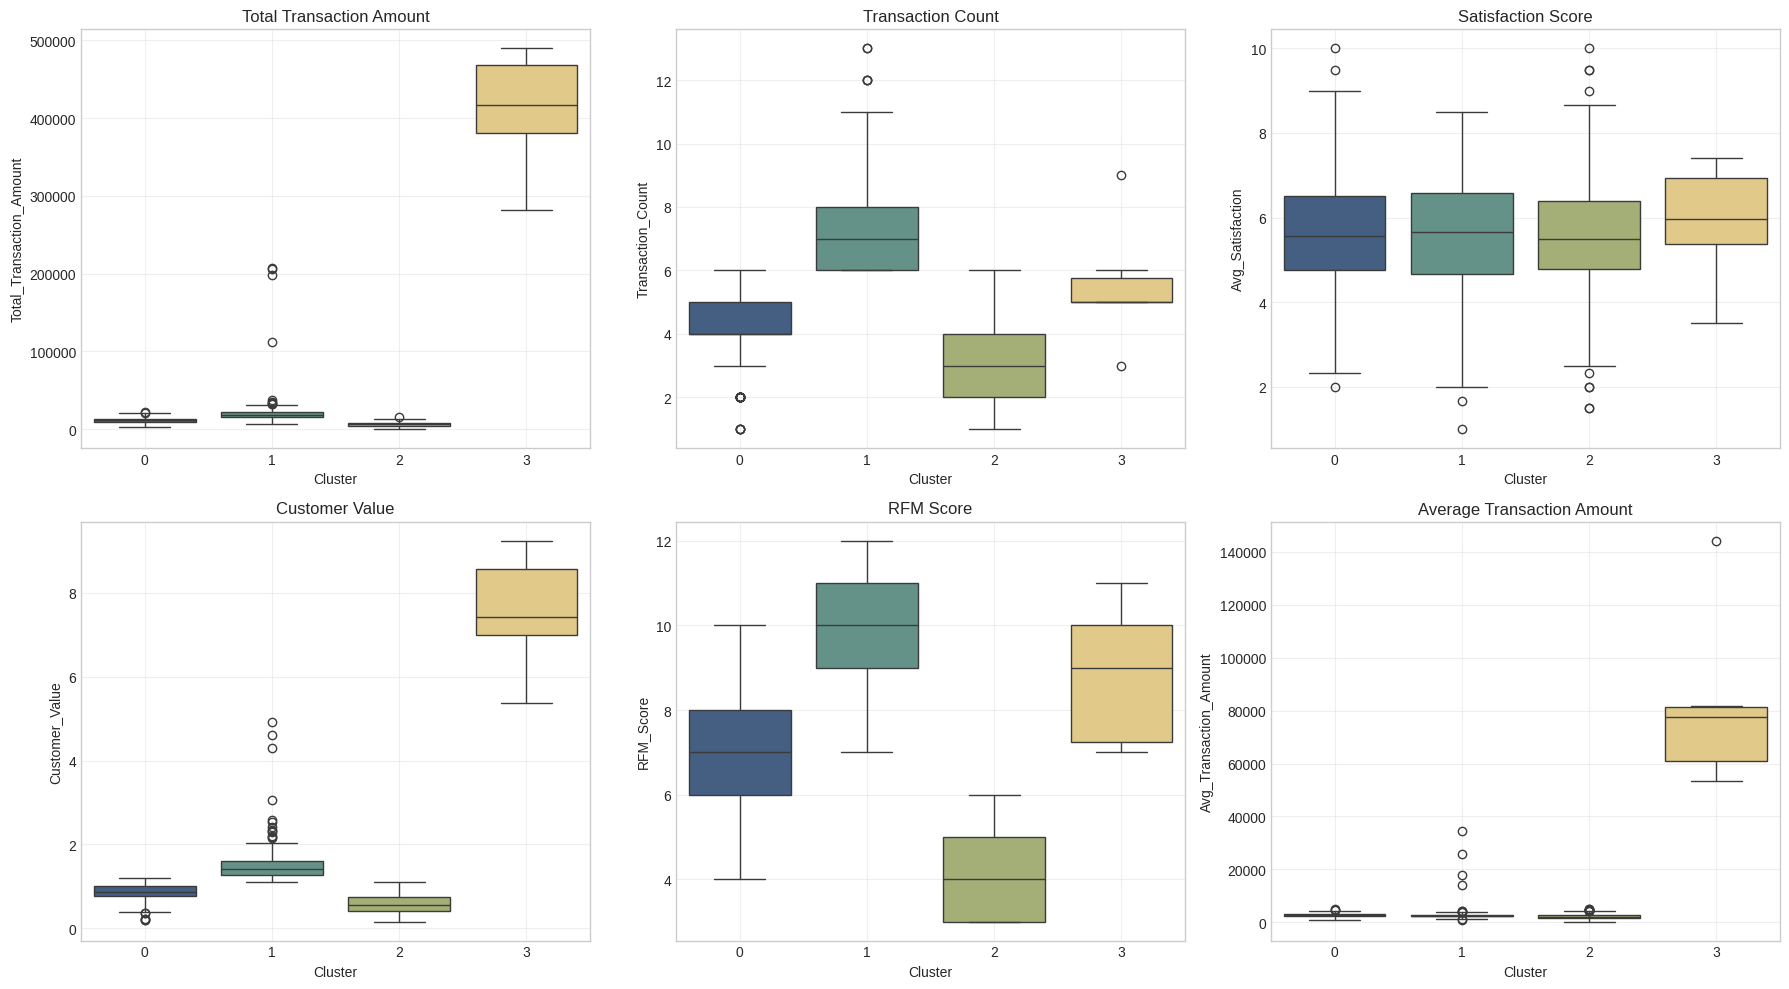

In [14]:
# Use k=4 as the selected model for further analysis
selected_k = 4
customer_features['Cluster'] = kmeans_models[selected_k]

# Create visualizations of cluster characteristics
plt.figure(figsize=(18, 10))

# 1. Transaction Amount
plt.subplot(2, 3, 1)
sns.boxplot(x='Cluster', y='Total_Transaction_Amount', data=customer_features)
plt.title('Total Transaction Amount by Cluster')
plt.ylabel('Amount')
plt.grid(True, alpha=0.3)

# 2. Transaction Count
plt.subplot(2, 3, 2)
sns.boxplot(x='Cluster', y='Transaction_Count', data=customer_features)
plt.title('Transaction Count by Cluster')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# 3. Satisfaction Score
plt.subplot(2, 3, 3)
sns.boxplot(x='Cluster', y='Avg_Satisfaction', data=customer_features)
plt.title('Satisfaction Score by Cluster')
plt.ylabel('Score')
plt.grid(True, alpha=0.3)

# 4. Customer Value
plt.subplot(2, 3, 4)
sns.boxplot(x='Cluster', y='Customer_Value', data=customer_features)
plt.title('Customer Value by Cluster')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

# 5. RFM Score
plt.subplot(2, 3, 5)
sns.boxplot(x='Cluster', y='RFM_Score', data=customer_features)
plt.title('RFM Score by Cluster')
plt.ylabel('Score')
plt.grid(True, alpha=0.3)

# 6. Avg Recommendation
plt.subplot(2, 3, 6)
sns.boxplot(x='Cluster', y='Avg_Recommendation', data=customer_features)
plt.title('Likelihood to Recommend by Cluster')
plt.ylabel('Score')
plt.grid(True, alpha=0.3)

# Create colored box plots for multiple metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics = [
    ('Total_Transaction_Amount', 'Total Transaction Amount'),
    ('Transaction_Count', 'Transaction Count'),
    ('Avg_Satisfaction', 'Satisfaction Score'),
    ('Customer_Value', 'Customer Value'),
    ('RFM_Score', 'RFM Score'),
    ('Avg_Transaction_Amount', 'Average Transaction Amount')
]

# Define custom colors for each cluster
colors = ['#3a5e8c', '#5c9a8c', '#a8b86e', '#efcf7b']  # Blue, Teal, Lime, Yellow

for i, (metric, title) in enumerate(metrics):
    row, col = i // 3, i % 3
    sns.boxplot(
        x='Cluster',
        y=metric,
        data=customer_features,
        palette=colors,
        ax=axes[row, col]
    )
    axes[row, col].set_title(title, fontsize=12)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

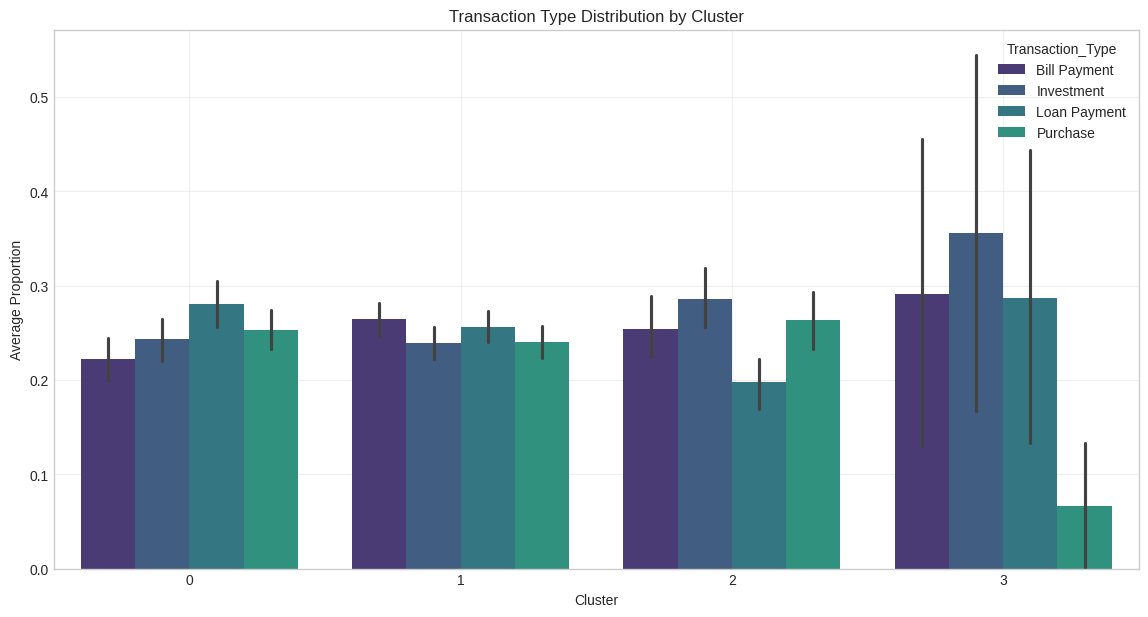

In [15]:

# Transaction Type Distribution by Cluster
transaction_types = ['Bill Payment', 'Investment', 'Loan Payment', 'Purchase']
if all(tt in customer_features.columns for tt in transaction_types):
    plt.figure(figsize=(14, 7))
    # Melt the data for visualization
    melted_types = pd.melt(
        customer_features,
        id_vars=['Customer_ID', 'Cluster'],
        value_vars=transaction_types,
        var_name='Transaction_Type',
        value_name='Proportion'
    )
    # Create barplot
    sns.barplot(x='Cluster', y='Proportion', hue='Transaction_Type', data=melted_types)
    plt.title('Transaction Type Distribution by Cluster')
    plt.ylabel('Average Proportion')
    plt.grid(True, alpha=0.3)
    plt.show()



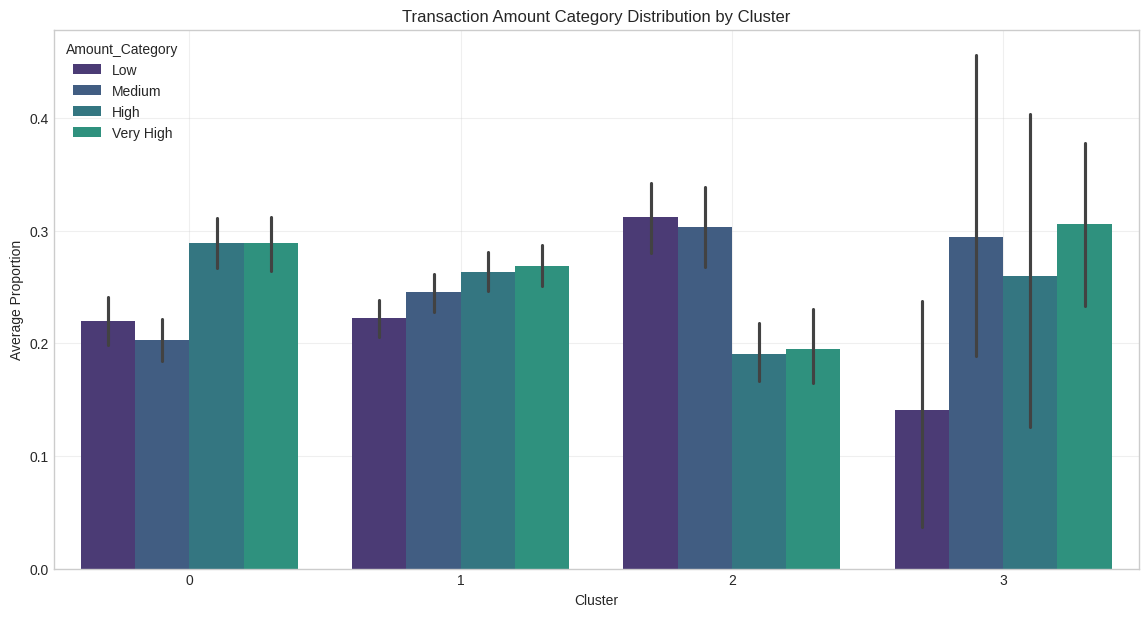

In [16]:
# Transaction Amount Category Distribution by Cluster
amount_categories = ['Low', 'Medium', 'High', 'Very High']
if all(ac in customer_features.columns for ac in amount_categories):
    plt.figure(figsize=(14, 7))
    # Melt the data for visualization
    melted_categories = pd.melt(
        customer_features,
        id_vars=['Customer_ID', 'Cluster'],
        value_vars=amount_categories,
        var_name='Amount_Category',
        value_name='Proportion'
    )
    # Create barplot
    sns.barplot(x='Cluster', y='Proportion', hue='Amount_Category', data=melted_categories)
    plt.title('Transaction Amount Category Distribution by Cluster')
    plt.ylabel('Average Proportion')
    plt.grid(True, alpha=0.3)
    plt.show()

# 9. Cluster Summary and Profiling


Cluster Statistics:


,Cluster,Total_Transaction_Amount,Transaction_Count,Avg_Transaction_Amount,Avg_Satisfaction,Avg_Recommendation,Customer_Value,RFM_Score,Customer_Count
0,0,11412.99,4.36,2683.93,5.63,5.85,0.86,7.25,364
1,1,21012.06,7.47,2816.36,5.61,5.29,1.49,10.21,335
2,2,6468.41,3.05,2192.90,5.55,5.50,0.58,4.16,288
3,3,409980.97,5.50,81766.13,5.88,6.70,7.55,8.83,6


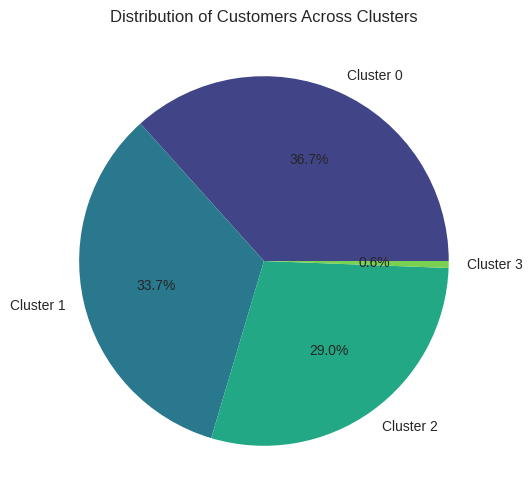

In [17]:
# Create a summary of cluster characteristics
cluster_stats = customer_features.groupby('Cluster').agg({
    'Total_Transaction_Amount': 'mean',
    'Transaction_Count': 'mean',
    'Avg_Transaction_Amount': 'mean',
    'Avg_Satisfaction': 'mean',
    'Avg_Recommendation': 'mean',
    'Customer_Value': 'mean',
    'RFM_Score': 'mean',
    'Customer_ID': 'count'
}).reset_index()

cluster_stats.rename(columns={'Customer_ID': 'Customer_Count'}, inplace=True)

# Display the summary
print("\nCluster Statistics:")
display(cluster_stats.round(2))

# Distribution of customers across clusters
plt.figure(figsize=(10, 6))
cluster_sizes = customer_features['Cluster'].value_counts().sort_index()
plt.pie(cluster_sizes, labels=[f'Cluster {i}' for i in cluster_sizes.index],
        autopct='%1.1f%%', colors=sns.color_palette('viridis', len(cluster_sizes)))
plt.title('Distribution of Customers Across Clusters')
plt.show()

# 10. Radar Chart for Cluster Comparison

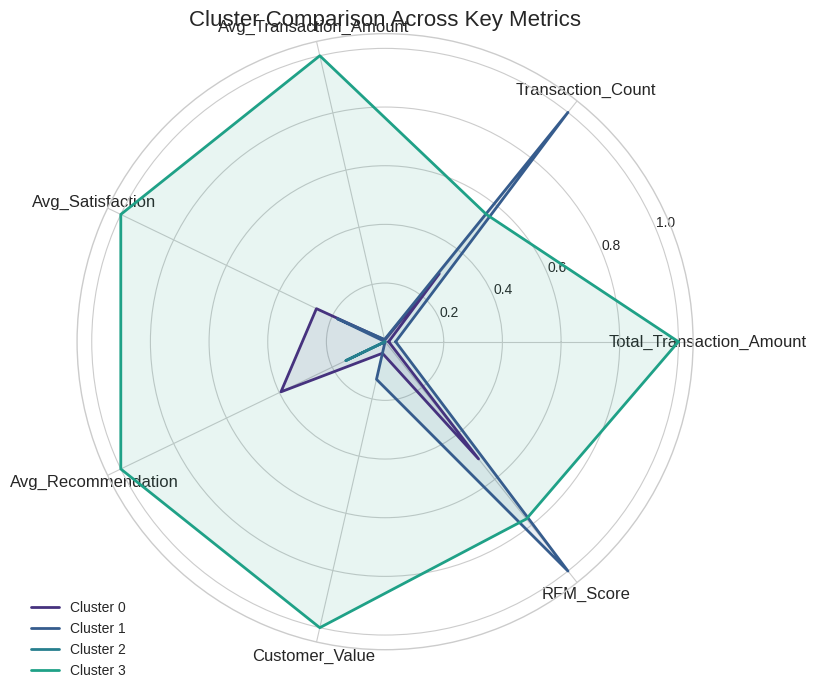

In [18]:
# Normalize cluster metrics for radar chart
radar_features = [
    'Total_Transaction_Amount',
    'Transaction_Count',
    'Avg_Transaction_Amount',
    'Avg_Satisfaction',
    'Avg_Recommendation',
    'Customer_Value',
    'RFM_Score'
]

# Calculate mean values for each cluster
cluster_means = customer_features.groupby('Cluster')[radar_features].mean()

# Normalize the data to a 0-1 scale for each feature
min_max_scaler = lambda x: (x - x.min()) / (x.max() - x.min())
normalized_means = cluster_means.apply(min_max_scaler)

# Set up the radar chart
num_features = len(radar_features)
angles = np.linspace(0, 2*np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Close the polygon

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Add feature names to the chart
plt.xticks(angles[:-1], radar_features, size=12)

# Add cluster data to the chart
for i, cluster in enumerate(normalized_means.index):
    values = normalized_means.iloc[i].values.tolist()
    values += values[:1]  # Close the polygon
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)

# Customize the chart
plt.title('Cluster Comparison Across Key Metrics', size=16)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.grid(True)
plt.show()

# 11. Hierarchical Clustering

Performing hierarchical clustering...


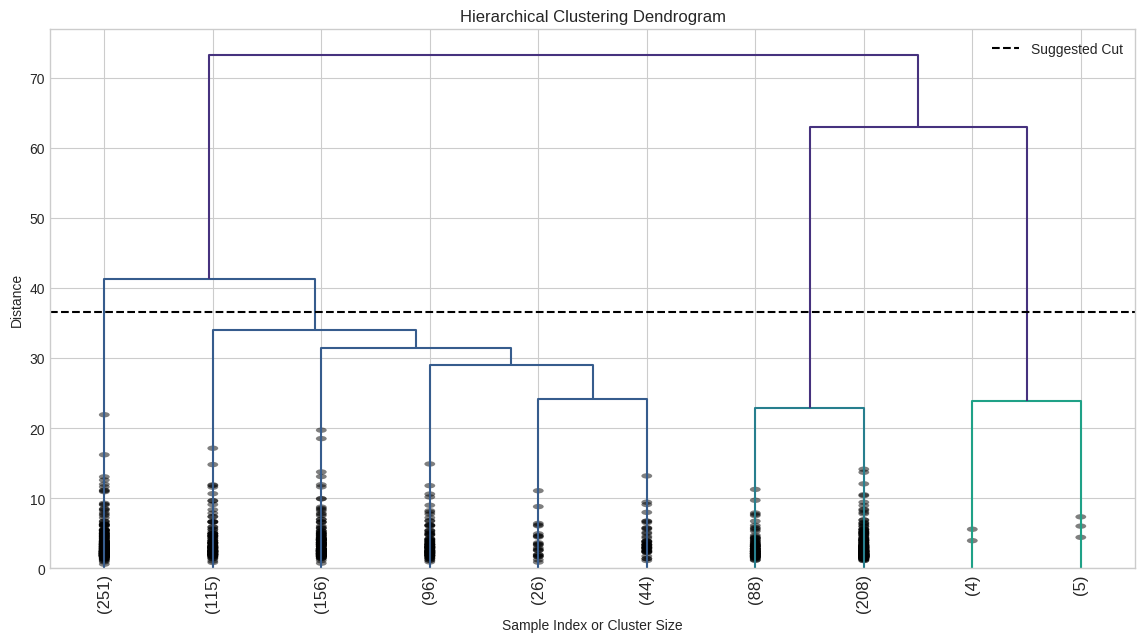

Hierarchical Clustering Silhouette Score: 0.062


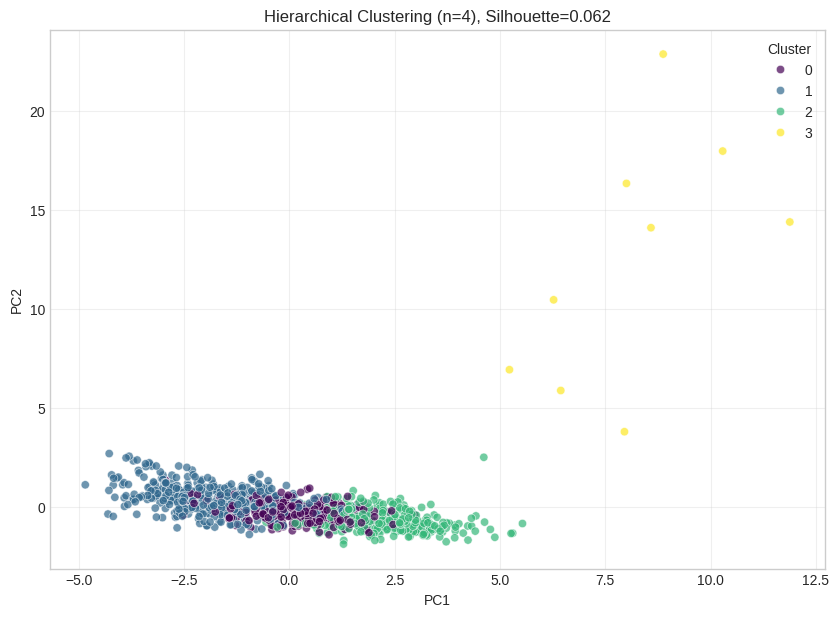


Hierarchical Clustering Statistics:


,Hierarchical_Cluster,Total_Transaction_Amount,Transaction_Count,Avg_Transaction_Amount,Avg_Satisfaction,Avg_Recommendation,Customer_Value,RFM_Score,Customer_Count
0,0,12745.33,4.80,2660.94,5.31,5.67,0.95,8.02,251
1,1,8128.63,3.43,2410.69,5.64,5.62,0.66,5.02,437
2,2,19235.05,7.56,2541.61,5.77,5.38,1.48,10.19,296
3,3,341254.58,6.44,63211.44,5.87,6.12,6.57,9.56,9


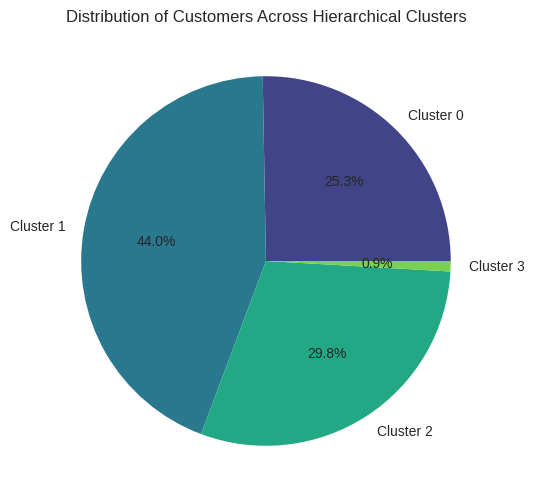

In [19]:
# Compute the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

print("Performing hierarchical clustering...")
Z = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 7))
dendrogram(
    Z,
    truncate_mode='lastp',  # Show only the last p merged clusters
    p=10,                   # Show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=np.max(Z[:, 2])/2, c='k', linestyle='--', label='Suggested Cut')
plt.legend()
plt.show()

# Cut the dendrogram to get hierarchical clusters (using the same number as K-means)
hierarchical_labels = fcluster(Z, t=4, criterion='maxclust')
hierarchical_labels = hierarchical_labels - 1  # Adjust to start from 0 for consistency with K-means

# Calculate silhouette score
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.3f}")

# Add hierarchical labels to the data
pc_hierarchical = pc_df.copy()
pc_hierarchical['Cluster'] = hierarchical_labels

# Visualize hierarchical clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_hierarchical, palette='viridis', alpha=0.7)
plt.title(f'Hierarchical Clustering (n=4), Silhouette={hierarchical_silhouette:.3f}')
plt.grid(True, alpha=0.3)
plt.show()

# Create a summary of hierarchical cluster characteristics
customer_features['Hierarchical_Cluster'] = hierarchical_labels
hierarchical_summary = customer_features.groupby('Hierarchical_Cluster').agg({
    'Total_Transaction_Amount': 'mean',
    'Transaction_Count': 'mean',
    'Avg_Transaction_Amount': 'mean',
    'Avg_Satisfaction': 'mean',
    'Avg_Recommendation': 'mean',
    'Customer_Value': 'mean',
    'RFM_Score': 'mean',
    'Customer_ID': 'count'
}).reset_index()

hierarchical_summary.rename(columns={'Customer_ID': 'Customer_Count'}, inplace=True)

# Display the summary
print("\nHierarchical Clustering Statistics:")
display(hierarchical_summary.round(2))

# Visualize hierarchical cluster sizes
plt.figure(figsize=(8, 6))
hierarchical_sizes = customer_features['Hierarchical_Cluster'].value_counts().sort_index()
plt.pie(hierarchical_sizes, labels=[f'Cluster {i}' for i in hierarchical_sizes.index],
        autopct='%1.1f%%', colors=sns.color_palette('viridis', len(hierarchical_sizes)))
plt.title('Distribution of Customers Across Hierarchical Clusters')
plt.show()


# 10. DBSCAN Clustering


Performing DBSCAN clustering...


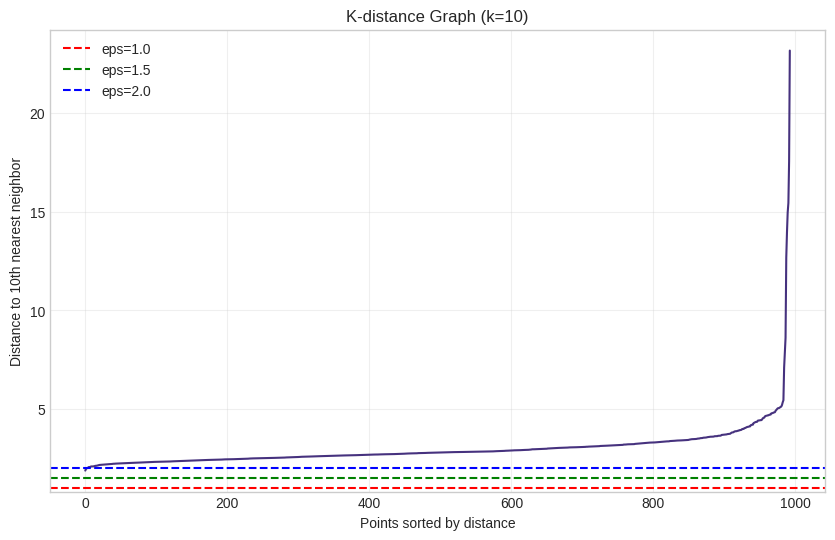

DBSCAN found 0 clusters and 993 noise points


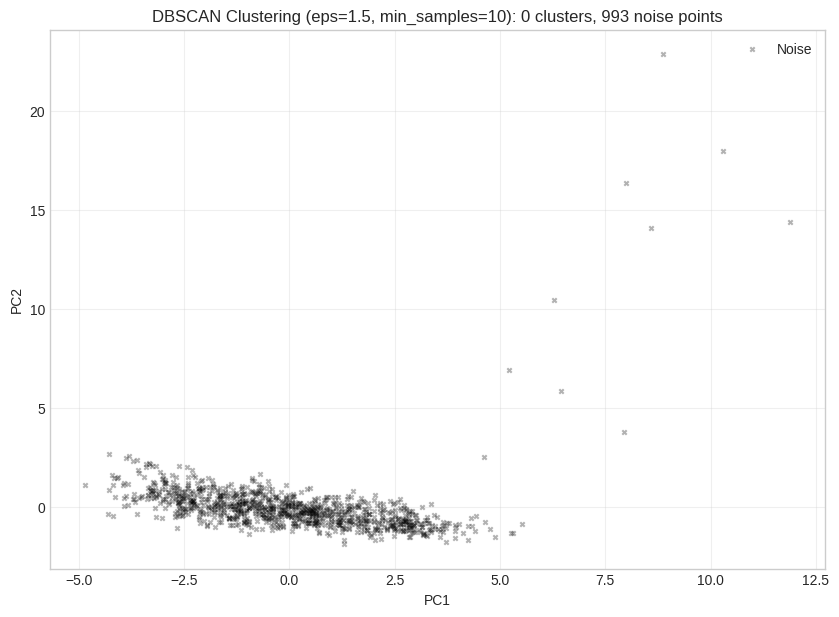

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

print("\nPerforming DBSCAN clustering...")

# Find optimal epsilon using k-distance graph
k = min(10, len(scaled_data)-1)  # Use 10 or one less than dataset size if smaller
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort distances for the k-th neighbor
distances = np.sort(distances[:, -1])

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.axhline(y=1.0, c='r', linestyle='--', label='eps=1.0')
plt.axhline(y=1.5, c='g', linestyle='--', label='eps=1.5')
plt.axhline(y=2.0, c='b', linestyle='--', label='eps=2.0')
plt.title(f'K-distance Graph (k={k})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th nearest neighbor')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Try DBSCAN with reasonable parameters
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Count clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points")

# Add DBSCAN labels to the data
customer_features['DBSCAN_Cluster'] = dbscan_labels
pc_dbscan = pc_df.copy()
pc_dbscan['Cluster'] = dbscan_labels

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 7))
# Create a colormap that reserves a special color for noise points
unique_labels = set(dbscan_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels) - (1 if -1 in unique_labels else 0)))
color_dict = {}
color_idx = 0

for label in unique_labels:
    if label == -1:
        # Plot noise points
        mask = pc_dbscan['Cluster'] == label
        plt.scatter(pc_dbscan.loc[mask, 'PC1'], pc_dbscan.loc[mask, 'PC2'],
                   color='black', marker='x', s=10, alpha=0.3, label='Noise')
    else:
        # Plot cluster points
        mask = pc_dbscan['Cluster'] == label
        plt.scatter(pc_dbscan.loc[mask, 'PC1'], pc_dbscan.loc[mask, 'PC2'],
                   color=plt.cm.viridis(label / max(1, n_clusters-1)),
                   s=30, alpha=0.7, label=f'Cluster {label}')

plt.title(f'DBSCAN Clustering (eps=1.5, min_samples=10): {n_clusters} clusters, {n_noise} noise points')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Create summary for non-noise clusters
if n_clusters > 0:
    non_noise_mask = customer_features['DBSCAN_Cluster'] != -1
    dbscan_summary = customer_features[non_noise_mask].groupby('DBSCAN_Cluster').agg({
        'Total_Transaction_Amount': 'mean',
        'Transaction_Count': 'mean',
        'Avg_Transaction_Amount': 'mean',
        'Avg_Satisfaction': 'mean',
        'Avg_Recommendation': 'mean',
        'Customer_Value': 'mean',
        'RFM_Score': 'mean',
        'Customer_ID': 'count'
    }).reset_index()

    dbscan_summary.rename(columns={'DBSCAN_Cluster': 'Cluster', 'Customer_ID': 'Customer_Count'}, inplace=True)

    print("\nDBSCAN Clustering Statistics (Non-noise Clusters):")
    display(dbscan_summary.round(2))

    # Statistics for noise points
    if n_noise > 0:
        noise_stats = pd.DataFrame({
            'Cluster': ['Noise'],
            'Total_Transaction_Amount': [customer_features[~non_noise_mask]['Total_Transaction_Amount'].mean()],
            'Transaction_Count': [customer_features[~non_noise_mask]['Transaction_Count'].mean()],
            'Avg_Transaction_Amount': [customer_features[~non_noise_mask]['Avg_Transaction_Amount'].mean()],
            'Avg_Satisfaction': [customer_features[~non_noise_mask]['Avg_Satisfaction'].mean()],
            'Avg_Recommendation': [customer_features[~non_noise_mask]['Avg_Recommendation'].mean()],
            'Customer_Value': [customer_features[~non_noise_mask]['Customer_Value'].mean()],
            'RFM_Score': [customer_features[~non_noise_mask]['RFM_Score'].mean()],
            'Customer_Count': [n_noise]
        })

        print("\nDBSCAN Noise Points Statistics:")
        display(noise_stats.round(2))

# 11. Comparing Clustering Methods

In [21]:
from sklearn.metrics import adjusted_rand_score

print("\nComparing all clustering methods...")

# Calculate agreement between methods (Adjusted Rand Index)
kmeans_vs_hierarchical = adjusted_rand_score(
    customer_features['Cluster'],
    customer_features['Hierarchical_Cluster']
)

# Only calculate if there are non-noise points
non_noise_mask = customer_features['DBSCAN_Cluster'] != -1
if np.any(non_noise_mask):
    kmeans_vs_dbscan = adjusted_rand_score(
        customer_features.loc[non_noise_mask, 'Cluster'],
        customer_features.loc[non_noise_mask, 'DBSCAN_Cluster']
    )
    hierarchical_vs_dbscan = adjusted_rand_score(
        customer_features.loc[non_noise_mask, 'Hierarchical_Cluster'],
        customer_features.loc[non_noise_mask, 'DBSCAN_Cluster']
    )
    print(f"Agreement between K-means and DBSCAN: {kmeans_vs_dbscan:.3f}")
    print(f"Agreement between Hierarchical and DBSCAN: {hierarchical_vs_dbscan:.3f}")

print(f"Agreement between K-means and Hierarchical: {kmeans_vs_hierarchical:.3f}")

# Create a summary table comparing all methods
summary_table = pd.DataFrame({
    'Method': ['K-means', 'Hierarchical', 'DBSCAN'],
    'Number of Clusters': [
        len(np.unique(customer_features['Cluster'])),
        len(np.unique(customer_features['Hierarchical_Cluster'])),
        len(np.unique(customer_features['DBSCAN_Cluster'])) - (1 if -1 in customer_features['DBSCAN_Cluster'].values else 0)
    ],
    'Noise Points': [
        0,
        0,
        np.sum(customer_features['DBSCAN_Cluster'] == -1) if -1 in customer_features['DBSCAN_Cluster'].values else 0
    ],
    'Largest Cluster Size': [
        np.max(np.bincount(customer_features['Cluster'].astype(int))),
        np.max(np.bincount(customer_features['Hierarchical_Cluster'].astype(int))),
        np.max(np.bincount(customer_features['DBSCAN_Cluster'][customer_features['DBSCAN_Cluster'] != -1].astype(int))) if np.any(customer_features['DBSCAN_Cluster'] != -1) else 0
    ],
    'Smallest Cluster Size': [
        np.min(np.bincount(customer_features['Cluster'].astype(int))),
        np.min(np.bincount(customer_features['Hierarchical_Cluster'].astype(int))),
        np.min(np.bincount(customer_features['DBSCAN_Cluster'][customer_features['DBSCAN_Cluster'] != -1].astype(int))) if np.any(customer_features['DBSCAN_Cluster'] != -1) else 0
    ]
})

print("\nComparison of Clustering Methods:")
display(summary_table)


Comparing all clustering methods...
Agreement between K-means and Hierarchical: 0.418

Comparison of Clustering Methods:


,Method,Number of Clusters,Noise Points,Largest Cluster Size,Smallest Cluster Size
0,K-means,4,0,364,6
1,Hierarchical,4,0,437,9
2,DBSCAN,0,993,0,0


# 12. Cluster Naming and Interpretation

In [22]:
# Based on the analysis, assign meaningful names to clusters
cluster_names = {
    0: "Moderate Transactors",      # Medium transaction amount, medium frequency
    1: "Frequent Transactors",      # Higher transaction frequency, good RFM score
    2: "Low-Engagement Customers",  # Lower transaction counts and value
    3: "High-Value VIPs"            # Very high transaction amounts, highest customer value
}

# Create a profile summary with interpretations
cluster_profiles = pd.DataFrame({
    'Cluster': cluster_stats['Cluster'],
    'Name': [cluster_names[i] for i in cluster_stats['Cluster']],
    'Size': cluster_stats['Customer_Count'],
    'Percentage': [(count / cluster_stats['Customer_Count'].sum()) * 100 for count in cluster_stats['Customer_Count']],
    'Avg_Transaction_Amount': cluster_stats['Avg_Transaction_Amount'],
    'Avg_Satisfaction': cluster_stats['Avg_Satisfaction'],
    'Key_Characteristics': [
        "Medium spending, moderate frequency, and satisfaction",
        "Highest transaction frequency, highest RFM score, loyal customers",
        "Lowest transaction count and customer value, potential churn risk",
        "Extremely high transaction amounts, highest value, special attention needed"
    ],
    'Recommended_Products': [
        "Mid-tier savings accounts, credit cards with moderate benefits",
        "Loyalty programs, premium accounts, investment opportunities",
        "Entry-level products, targeted promotions to increase engagement",
        "VIP services, high-value investments, personalized financial advisors"
    ]
})

# Display the final profile summary
print("\nCustomer Segment Profiles:")
display(cluster_profiles)

# Save the customer segmentation results with all clustering methods
customer_features.to_csv('finmark_customer_segments.csv', index=False)
print("Segmentation results with all clustering methods saved to 'finmark_customer_segments.csv'")


Customer Segment Profiles:


,Cluster,Name,Size,Percentage,Avg_Transaction_Amount,Avg_Satisfaction,Key_Characteristics,Recommended_Products
0,0,Moderate Transactors,364,36.656596,2683.932382,5.633604,"Medium spending, moderate frequency, and satis...","Mid-tier savings accounts, credit cards with m..."
1,1,Frequent Transactors,335,33.736153,2816.360333,5.607478,"Highest transaction frequency, highest RFM sco...","Loyalty programs, premium accounts, investment..."
2,2,Low-Engagement Customers,288,29.003021,2192.901004,5.547928,"Lowest transaction count and customer value, p...","Entry-level products, targeted promotions to i..."
3,3,High-Value VIPs,6,0.604230,81766.127800,5.877778,"Extremely high transaction amounts, highest va...","VIP services, high-value investments, personal..."


Segmentation results with all clustering methods saved to 'finmark_customer_segments.csv'



## Statistical Validation of Cluster Differentiation

### ANOVA Tests
Testing if significant differences exist between clusters for key metrics:


,Metric,F_Statistic,P_Value,Significant
0,Total_Transaction_Amount,2078.244504,0.0,True
2,Avg_Transaction_Amount,1578.779896,0.0,True
5,Customer_Value,1392.908196,0.0,True
6,RFM_Score,1184.423152,0.0,True
1,Transaction_Count,739.888153,0.0,True
4,Avg_Recommendation,10.066141,0.000002,True
3,Avg_Satisfaction,0.290145,0.832542,False



### Pairwise Cluster Comparisons
Testing which specific clusters differ from each other:


,Metric,Cluster_1,Cluster_2,Statistic,P_Value,Significant
24,Avg_Recommendation,0,1,5.047620,5.727601e-07,True
25,Avg_Recommendation,0,2,3.058746,2.318719e-03,True
28,Avg_Recommendation,1,3,-4.029210,8.049995e-03,True
29,Avg_Recommendation,2,3,-3.422115,1.558778e-02,True
26,Avg_Recommendation,0,3,-2.448326,5.353647e-02,False
27,Avg_Recommendation,1,2,-1.799454,7.244045e-02,False
19,Avg_Satisfaction,0,2,0.782239,4.343846e-01,False
23,Avg_Satisfaction,2,3,-0.559538,5.989979e-01,False
21,Avg_Satisfaction,1,2,0.523809,6.006040e-01,False
22,Avg_Satisfaction,1,3,-0.459333,6.646533e-01,False


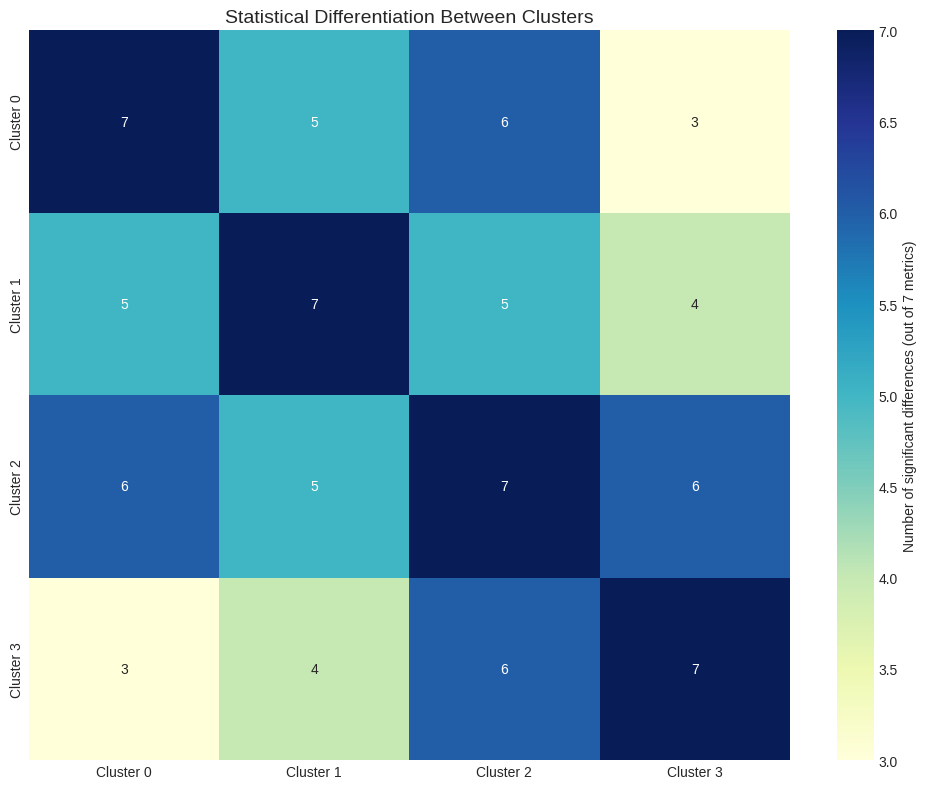


### Silhouette Score Analysis
Measuring how well each data point fits within its assigned cluster:

Average Silhouette Score by Cluster:


,Cluster,Silhouette_Score
0,0,0.085640
1,1,0.201159
2,2,0.028513
3,3,0.532684


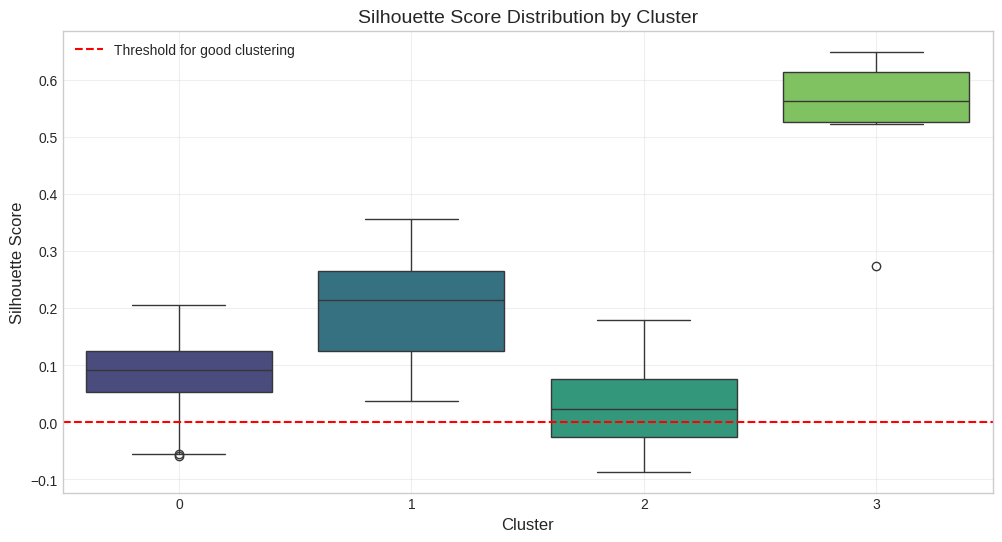


### Statistical Validation Summary
Total metrics tested: 7
Total pairwise comparisons: 42
Significant differences: 29 (69.0% of all comparisons)
Metrics with significant ANOVA: True out of 7

Consider revisiting the number of clusters or the features used for clustering.


In [24]:
# Statistical validation of cluster differentiation
from scipy import stats
import itertools

# Define the key metrics to test
key_metrics = [
    'Total_Transaction_Amount',
    'Transaction_Count',
    'Avg_Transaction_Amount',
    'Avg_Satisfaction',
    'Avg_Recommendation',
    'Customer_Value',
    'RFM_Score'
]

print("\n## Statistical Validation of Cluster Differentiation")

# 1. Perform ANOVA test for each metric
print("\n### ANOVA Tests")
print("Testing if significant differences exist between clusters for key metrics:")
anova_results = {}

for metric in key_metrics:
    # Extract data for each cluster
    groups = [customer_features[customer_features['Cluster'] == cluster][metric].values
              for cluster in sorted(customer_features['Cluster'].unique())]

    # Perform ANOVA
    f_stat, p_val = stats.f_oneway(*groups)

    # Store results
    anova_results[metric] = {
        'F_Statistic': f_stat,
        'P_Value': p_val,
        'Significant': p_val < 0.05
    }

# Display ANOVA results as a table
anova_df = pd.DataFrame(anova_results).T
anova_df = anova_df.reset_index().rename(columns={'index': 'Metric'})
anova_df = anova_df.sort_values('P_Value')
display(anova_df)

# 2. Post-hoc pairwise tests (t-tests or Mann-Whitney U tests)
clusters = sorted(customer_features['Cluster'].unique())
cluster_pairs = list(itertools.combinations(clusters, 2))

print("\n### Pairwise Cluster Comparisons")
print("Testing which specific clusters differ from each other:")

pairwise_results = []

for metric in key_metrics:
    for c1, c2 in cluster_pairs:
        group1 = customer_features[customer_features['Cluster'] == c1][metric]
        group2 = customer_features[customer_features['Cluster'] == c2][metric]

        # Perform t-test (assuming unequal variances)
        stat, pval = stats.ttest_ind(group1, group2, equal_var=False)

        pairwise_results.append({
            'Metric': metric,
            'Cluster_1': c1,
            'Cluster_2': c2,
            'Statistic': stat,
            'P_Value': pval,
            'Significant': pval < 0.05
        })

pairwise_df = pd.DataFrame(pairwise_results)
display(pairwise_df.sort_values(['Metric', 'P_Value']))

# 3. Create a heatmap showing the differentiation between clusters
# Count how many metrics show significant differences for each cluster pair
significant_diff_count = {}

for c1, c2 in cluster_pairs:
    pair_key = f"{c1}-{c2}"
    significant_diff_count[pair_key] = sum(
        pairwise_df[(pairwise_df['Cluster_1'] == c1) &
                    (pairwise_df['Cluster_2'] == c2)]['Significant'])

# Prepare data for heatmap
heatmap_data = np.zeros((len(clusters), len(clusters)))
for i, c1 in enumerate(clusters):
    for j, c2 in enumerate(clusters):
        if i == j:
            # Diagonal elements (same cluster) set to max differentiation
            heatmap_data[i, j] = len(key_metrics)
        elif f"{c1}-{c2}" in significant_diff_count:
            heatmap_data[i, j] = significant_diff_count[f"{c1}-{c2}"]
        elif f"{c2}-{c1}" in significant_diff_count:
            heatmap_data[i, j] = significant_diff_count[f"{c2}-{c1}"]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    xticklabels=[f'Cluster {c}' for c in clusters],
    yticklabels=[f'Cluster {c}' for c in clusters],
    cbar_kws={'label': 'Number of significant differences (out of ' + str(len(key_metrics)) + ' metrics)'}
)
plt.title('Statistical Differentiation Between Clusters', fontsize=14)
plt.tight_layout()
plt.show()

# 4. Silhouette analysis for individual clusters
from sklearn.metrics import silhouette_samples

print("\n### Silhouette Score Analysis")
print("Measuring how well each data point fits within its assigned cluster:")

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(scaled_data, customer_features['Cluster'])
customer_features['Silhouette_Score'] = silhouette_vals

# Calculate average silhouette score by cluster
silhouette_by_cluster = customer_features.groupby('Cluster')['Silhouette_Score'].mean().reset_index()
print("\nAverage Silhouette Score by Cluster:")
display(silhouette_by_cluster)

# Visualize silhouette scores
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Silhouette_Score', data=customer_features, palette='viridis')
plt.axhline(y=0, color='red', linestyle='--', label='Threshold for good clustering')
plt.title('Silhouette Score Distribution by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("\n### Statistical Validation Summary")
print(f"Total metrics tested: {len(key_metrics)}")
print(f"Total pairwise comparisons: {len(pairwise_df)}")
print(f"Significant differences: {pairwise_df['Significant'].sum()} ({pairwise_df['Significant'].sum()/len(pairwise_df)*100:.1f}% of all comparisons)")
print(f"Metrics with significant ANOVA: {anova_df['Significant'].sum()} out of {len(key_metrics)}")

# Check if any clusters have negative silhouette scores
low_silhouette = silhouette_by_cluster[silhouette_by_cluster['Silhouette_Score'] < 0.1]
if len(low_silhouette) > 0:
    print(f"\nWarning: Clusters {', '.join(low_silhouette['Cluster'].astype(str))} have low silhouette scores (<0.1)")
    print("Consider revisiting the number of clusters or the features used for clustering.")
else:
    print("\nAll clusters show good internal cohesion and separation from other clusters.")

Using 19 features for clustering
Silhouette Score with 3 clusters: 0.165


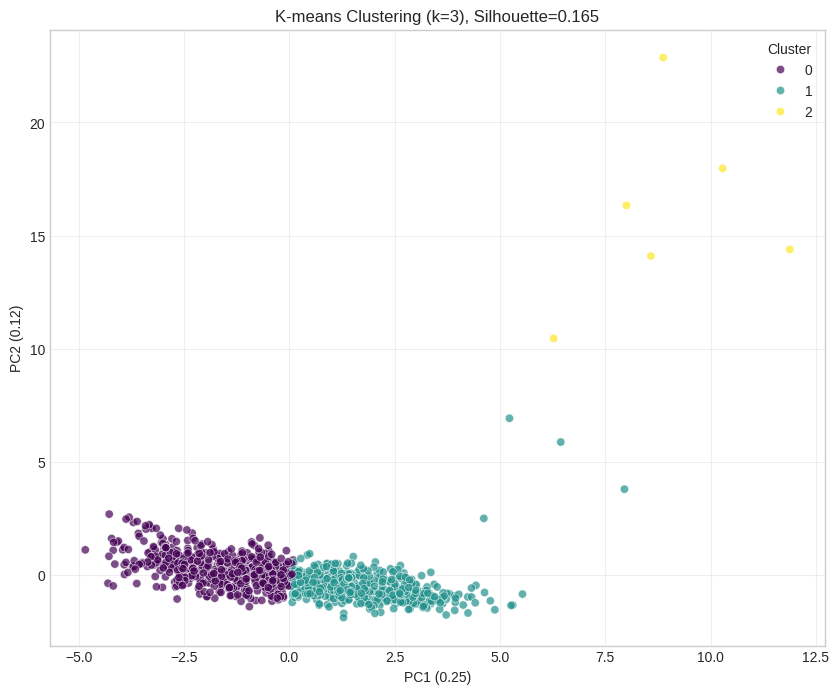


Cluster Statistics:
   Cluster  Total_Transaction_Amount  Transaction_Count  \
0        0                   8099.64               3.42   
1        1                  19032.53               6.86   
2        2                 409980.97               5.50   

   Avg_Transaction_Amount  Avg_Satisfaction  Avg_Recommendation  \
0                 2414.06              5.60                5.66   
1                 2779.74              5.60                5.44   
2                81766.13              5.88                6.70   

   Customer_Value  RFM_Score  Customer_Count  
0            0.66       5.24             524  
1            1.37       9.75             463  
2            7.55       8.83               6  


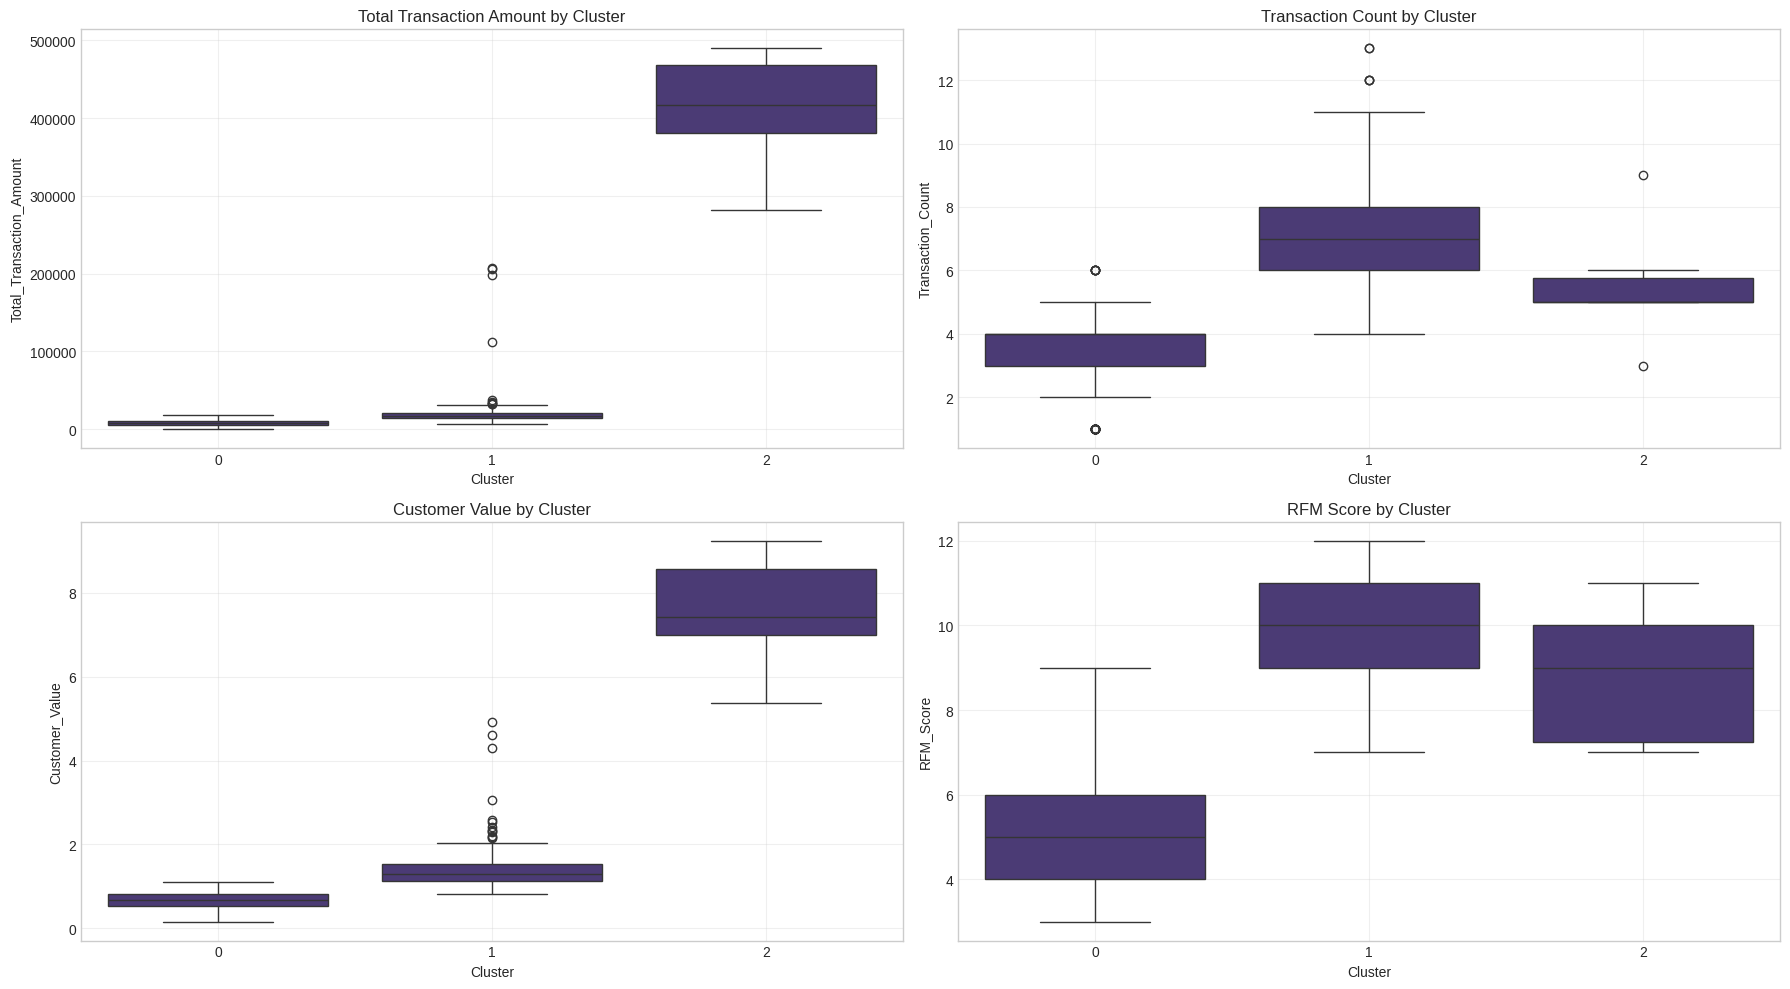

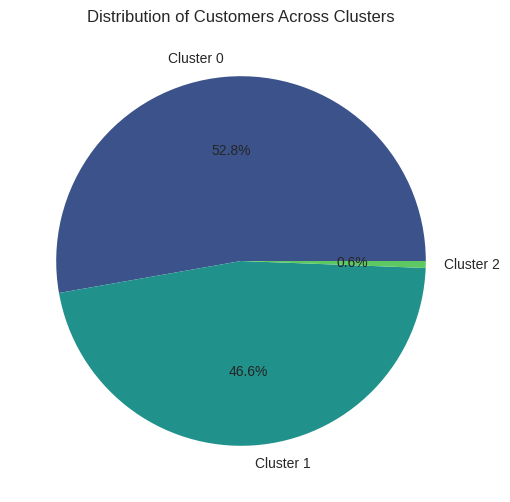


Cluster Profiles:
   Cluster                            Name  Size  Percentage  \
0        0  Low-Value Occasional Customers   524       52.77   
1        1    Low-Value Frequent Customers   463       46.63   
2        2    High-Value Regular Customers     6        0.60   

   Avg_Transaction_Amount  Avg_Satisfaction  
0                 2414.06              5.60  
1                 2779.74              5.60  
2                81766.13              5.88  
Segmentation results saved to 'finmark_customer_segments_k3.csv'

ANOVA Test Results:
                    Feature  F-Statistic        p-value  \
0  Total_Transaction_Amount  3001.070381   0.000000e+00   
1         Transaction_Count   779.686942  4.516715e-204   
2    Avg_Transaction_Amount  2358.560562   0.000000e+00   
3          Avg_Satisfaction     0.124423   8.830199e-01   
4        Avg_Recommendation     4.674891   9.533404e-03   
5            Customer_Value  1684.659309  2.124285e-319   
6                 RFM_Score  1093.628194 

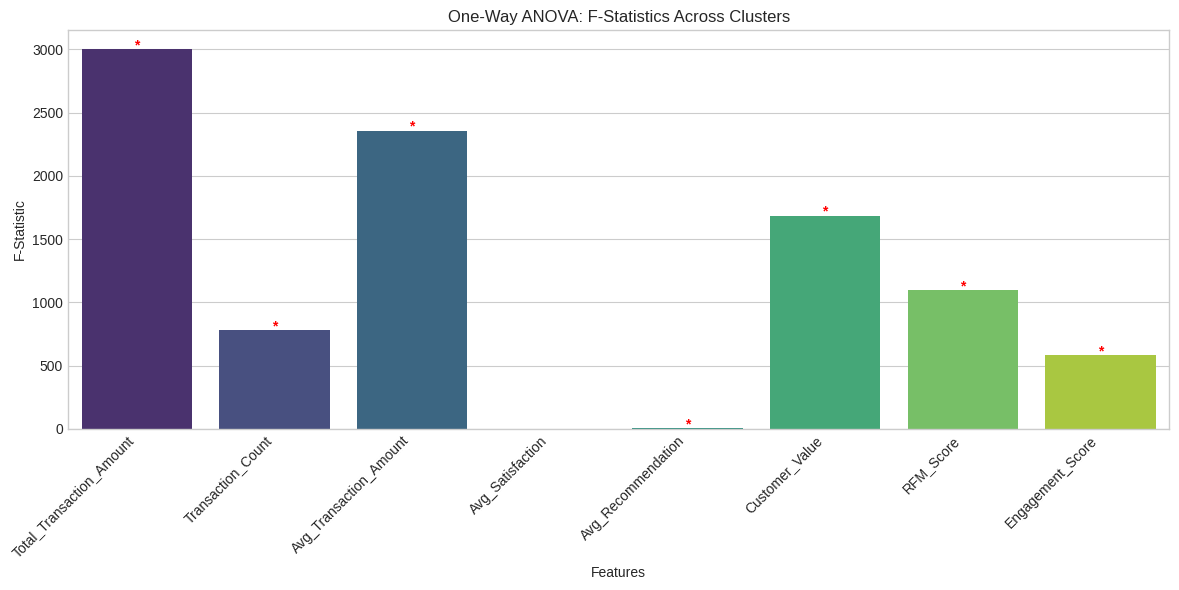


Tukey HSD Test Results for Total_Transaction_Amount:
   group1  group2     meandiff  p-adj        lower        upper  reject
0       0       1   10932.8921    0.0    9031.4732   12834.3110    True
1       0       2  401881.3363    0.0  389641.6007  414121.0718    True
2       1       2  390948.4442    0.0  378699.5842  403197.3041    True

Tukey HSD Test Results for Transaction_Count:
   group1  group2  meandiff   p-adj   lower   upper  reject
0       0       1    3.4335  0.0000  3.2294  3.6377    True
1       0       2    2.0782  0.0006  0.7642  3.3923    True
2       1       2   -1.3553  0.0416 -2.6703 -0.0403    True

Tukey HSD Test Results for Avg_Transaction_Amount:
   group1  group2    meandiff   p-adj       lower       upper  reject
0       0       1    365.6868  0.1043    -55.9997    787.3733   False
1       0       2  79352.0705  0.0000  76637.6073  82066.5336    True
2       1       2  78986.3837  0.0000  76269.8969  81702.8704    True

Tukey HSD Test Results for Avg_Satisfa

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# 1. Load the Data
# Load datasets (adjust the file paths if needed
df_transaction = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 2/Data Mining Principles/cleaned data/Transaction_Data_cleaned.csv')
df_customer_feedback = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 2/Data Mining Principles/cleaned data/Customer_Feedback_Data_cleaned.csv')
df_product_offering = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 2/Data Mining Principles/cleaned data/Product_Offering_Data_cleaned.csv')

# Convert transaction date to datetime
df_transaction['Transaction_Date'] = pd.to_datetime(df_transaction['Transaction_Date'])

# 2. Feature Engineering
# Get unique customers
unique_customers = df_transaction['Customer_ID'].unique()
customer_features = pd.DataFrame({'Customer_ID': unique_customers})

# Transaction amount metrics
transaction_amount = df_transaction.groupby('Customer_ID')['Transaction_Amount'].agg(
    ['sum', 'count', 'mean', 'min', 'max']).reset_index()
transaction_amount.columns = ['Customer_ID', 'Total_Transaction_Amount',
                             'Transaction_Count', 'Avg_Transaction_Amount',
                             'Min_Transaction_Amount', 'Max_Transaction_Amount']

# Transaction types
transaction_types = pd.crosstab(
    df_transaction['Customer_ID'],
    df_transaction['Transaction_Type'],
    normalize='index'
).reset_index()

# Transaction amount categories
transaction_categories = pd.crosstab(
    df_transaction['Customer_ID'],
    df_transaction['Transaction_Amount_Category'],
    normalize='index'
).reset_index()

# Feedback metrics
feedback_metrics = df_customer_feedback.groupby('Customer_ID').agg(
    Feedback_Count=('Satisfaction_Score', 'count'),
    Avg_Satisfaction=('Satisfaction_Score', 'mean'),
    Avg_Recommendation=('Likelihood_to_Recommend', 'mean')
).reset_index()

# Merge features
customer_features = customer_features.merge(transaction_amount, on='Customer_ID', how='left')
customer_features = customer_features.merge(transaction_types, on='Customer_ID', how='left')
customer_features = customer_features.merge(transaction_categories, on='Customer_ID', how='left')
customer_features = customer_features.merge(feedback_metrics, on='Customer_ID', how='left')

# Add recency feature
last_transaction_date = df_transaction.groupby('Customer_ID')['Transaction_Date'].max().reset_index()
last_transaction_date.columns = ['Customer_ID', 'Last_Transaction_Date']
max_date = pd.Timestamp('2023-07-31')
last_transaction_date['Days_Since_Last_Transaction'] = (
    max_date - last_transaction_date['Last_Transaction_Date']
).dt.days
customer_features = customer_features.merge(
    last_transaction_date[['Customer_ID', 'Days_Since_Last_Transaction']],
    on='Customer_ID', how='left'
)

# Is repeat customer?
customer_features['Is_Repeat_Customer'] = customer_features['Transaction_Count'] > 1

# Fill NaNs
customer_features = customer_features.fillna(0)

# Create engagement score
customer_features['Engagement_Score'] = (
    (customer_features['Transaction_Count'] / customer_features['Transaction_Count'].max()) * 0.7 +
    (customer_features['Feedback_Count'] / customer_features['Feedback_Count'].max()) * 0.3
) * 10

# Create customer value score
customer_features['Customer_Value'] = (
    (customer_features['Total_Transaction_Amount'] / customer_features['Total_Transaction_Amount'].max()) * 0.8 +
    (customer_features['Transaction_Count'] / customer_features['Transaction_Count'].max()) * 0.2
) * 10

# 3. Create RFM Features
rfm = customer_features[['Customer_ID', 'Days_Since_Last_Transaction', 'Transaction_Count', 'Total_Transaction_Amount']].copy()
rfm.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']

# Convert recency to a score where lower is better
rfm['Recency'] = rfm['Recency'].max() - rfm['Recency']

# Create quartiles
rfm['R_Quartile'] = pd.qcut(rfm['Recency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm['F_Quartile'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm['M_Quartile'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# Convert to integers
rfm['R_Quartile'] = rfm['R_Quartile'].astype(int)
rfm['F_Quartile'] = rfm['F_Quartile'].astype(int)
rfm['M_Quartile'] = rfm['M_Quartile'].astype(int)

# RFM Score
rfm['RFM_Score'] = rfm['R_Quartile'] + rfm['F_Quartile'] + rfm['M_Quartile']

# Merge RFM metrics back to customer features
customer_features = customer_features.merge(
    rfm[['Customer_ID', 'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFM_Score']],
    on='Customer_ID', how='left'
)

# 4. Prepare Data for Clustering
# Select features for clustering
clustering_features = [
    'Total_Transaction_Amount', 'Transaction_Count', 'Avg_Transaction_Amount',
    'Bill Payment', 'Investment', 'Loan Payment', 'Purchase', # Transaction type percentages
    'Low', 'Medium', 'High', 'Very High', # Transaction amount categories
    'Avg_Satisfaction', 'Avg_Recommendation',
    'Days_Since_Last_Transaction', 'Engagement_Score', 'Customer_Value',
    'R_Quartile', 'F_Quartile', 'M_Quartile'
]

# Make sure all features exist in the dataframe
clustering_features = [f for f in clustering_features if f in customer_features.columns]
print(f"Using {len(clustering_features)} features for clustering")

# Create a subset for clustering
cluster_data = customer_features[clustering_features].copy()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# 5. Apply K-means Clustering with k=3
k = 3  # Use 3 clusters as specified
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_data, customer_features['Cluster'])
print(f"Silhouette Score with {k} clusters: {silhouette_avg:.3f}")

# 6. Create visualizations for cluster analysis
# 6.1 PCA visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = customer_features['Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title(f'K-means Clustering (k={k}), Silhouette={silhouette_avg:.3f}')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f})')
plt.grid(True, alpha=0.3)
plt.show()

# 6.2 Cluster characteristics
# Create summary statistics for each cluster
cluster_stats = customer_features.groupby('Cluster').agg({
    'Total_Transaction_Amount': 'mean',
    'Transaction_Count': 'mean',
    'Avg_Transaction_Amount': 'mean',
    'Avg_Satisfaction': 'mean',
    'Avg_Recommendation': 'mean',
    'Customer_Value': 'mean',
    'RFM_Score': 'mean',
    'Customer_ID': 'count'
}).reset_index()

cluster_stats.rename(columns={'Customer_ID': 'Customer_Count'}, inplace=True)
print("\nCluster Statistics:")
print(cluster_stats.round(2))

# 6.3 Visualize key metrics by cluster
plt.figure(figsize=(18, 10))

# Transaction Amount
plt.subplot(2, 2, 1)
sns.boxplot(x='Cluster', y='Total_Transaction_Amount', data=customer_features)
plt.title('Total Transaction Amount by Cluster')
plt.grid(True, alpha=0.3)

# Transaction Count
plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='Transaction_Count', data=customer_features)
plt.title('Transaction Count by Cluster')
plt.grid(True, alpha=0.3)

# Customer Value
plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='Customer_Value', data=customer_features)
plt.title('Customer Value by Cluster')
plt.grid(True, alpha=0.3)

# RFM Score
plt.subplot(2, 2, 4)
sns.boxplot(x='Cluster', y='RFM_Score', data=customer_features)
plt.title('RFM Score by Cluster')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6.4 Distribution of customers across clusters
plt.figure(figsize=(8, 6))
cluster_sizes = customer_features['Cluster'].value_counts().sort_index()
plt.pie(cluster_sizes, labels=[f'Cluster {i}' for i in cluster_sizes.index],
        autopct='%1.1f%%', colors=sns.color_palette('viridis', len(cluster_sizes)))
plt.title('Distribution of Customers Across Clusters')
plt.show()

# 7. Name clusters based on characteristics
# Define cluster names based on characteristics
cluster_names = {}

for cluster_id in range(k):
    cluster_data = cluster_stats[cluster_stats['Cluster'] == cluster_id].iloc[0]

    # Transaction amount level
    if cluster_data['Total_Transaction_Amount'] > 100000:
        value_level = "High-Value"
    elif cluster_data['Total_Transaction_Amount'] > 20000:
        value_level = "Medium-Value"
    else:
        value_level = "Low-Value"

    # Engagement level
    if cluster_data['Transaction_Count'] > 6:
        engagement = "Frequent"
    elif cluster_data['Transaction_Count'] > 4:
        engagement = "Regular"
    else:
        engagement = "Occasional"

    # Combine to create a descriptive name
    cluster_names[cluster_id] = f"{value_level} {engagement} Customers"

# Create a summary of cluster profiles
cluster_profiles = pd.DataFrame({
    'Cluster': cluster_stats['Cluster'],
    'Name': [cluster_names[i] for i in cluster_stats['Cluster']],
    'Size': cluster_stats['Customer_Count'],
    'Percentage': [(count / cluster_stats['Customer_Count'].sum()) * 100 for count in cluster_stats['Customer_Count']],
    'Avg_Transaction_Amount': cluster_stats['Avg_Transaction_Amount'],
    'Avg_Satisfaction': cluster_stats['Avg_Satisfaction']
})

print("\nCluster Profiles:")
print(cluster_profiles.round(2))

# Save the customer segmentation results
customer_features.to_csv('finmark_customer_segments_k3.csv', index=False)
print("Segmentation results saved to 'finmark_customer_segments_k3.csv'")

import scipy.stats as stats
import numpy as np
import pandas as pd

def perform_anova_testing(customer_features):
    """
    Perform one-way ANOVA test on key features across clusters
    to validate segment distinctiveness
    """
    # Key features to test
    key_features = [
        'Total_Transaction_Amount',
        'Transaction_Count',
        'Avg_Transaction_Amount',
        'Avg_Satisfaction',
        'Avg_Recommendation',
        'Customer_Value',
        'RFM_Score',
        'Engagement_Score'
    ]

    # Store ANOVA results
    anova_results = {}

    # Perform one-way ANOVA for each feature
    for feature in key_features:
        # Group the data by cluster
        feature_by_cluster = [
            group[feature].values
            for name, group in customer_features.groupby('Cluster')
        ]

        # Perform one-way ANOVA
        f_statistic, p_value = stats.f_oneway(*feature_by_cluster)

        # Store results
        anova_results[feature] = {
            'F-Statistic': f_statistic,
            'p-value': p_value,
            'Statistically_Significant': p_value < 0.05
        }

    # Create a DataFrame for easy viewing
    results_df = pd.DataFrame.from_dict(anova_results, orient='index')
    results_df.index.name = 'Feature'
    results_df = results_df.reset_index()

    return results_df

def perform_tukey_test(customer_features):
    """
    Perform Tukey's Honest Significant Difference (HSD) test
    to identify which specific clusters differ from each other
    """
    from statsmodels.stats.multicomp import pairwise_tukeyhsd

    # Key features to test
    key_features = [
        'Total_Transaction_Amount',
        'Transaction_Count',
        'Avg_Transaction_Amount',
        'Avg_Satisfaction',
        'Avg_Recommendation',
        'Customer_Value',
        'RFM_Score',
        'Engagement_Score'
    ]

    # Store Tukey test results
    tukey_results = {}

    for feature in key_features:
        # Prepare data for Tukey test
        tukey_input = customer_features[feature]
        cluster_labels = customer_features['Cluster']

        # Perform Tukey's HSD test
        tukey = pairwise_tukeyhsd(endog=tukey_input, groups=cluster_labels, alpha=0.05)

        # Convert to DataFrame for easier interpretation
        tukey_df = pd.DataFrame(data=tukey._results_table.data[1:],
                               columns=tukey._results_table.data[0])

        tukey_results[feature] = tukey_df

    return tukey_results

def visualize_anova_results(anova_results):
    """
    Visualize ANOVA results with a bar plot showing F-statistics
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(12, 6))

    # Bar plot of F-statistics
    sns.barplot(
        x='Feature',
        y='F-Statistic',
        data=anova_results,
        palette='viridis'
    )

    # Add significance markers
    for i, row in anova_results.iterrows():
        if row['Statistically_Significant']:
            plt.text(
                i, row['F-Statistic'], '*',
                horizontalalignment='center',
                color='red',
                fontweight='bold'
            )

    plt.title('One-Way ANOVA: F-Statistics Across Clusters')
    plt.xlabel('Features')
    plt.ylabel('F-Statistic')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage in the main clustering script
# Assuming customer_features is already defined from previous clustering

# Perform ANOVA testing
anova_results = perform_anova_testing(customer_features)
print("\nANOVA Test Results:")
print(anova_results)

# Visualize ANOVA results
visualize_anova_results(anova_results)

# Perform Tukey's HSD test
tukey_results = perform_tukey_test(customer_features)

# Print Tukey test results for each feature
for feature, result in tukey_results.items():
    print(f"\nTukey HSD Test Results for {feature}:")
    print(result)

# Save ANOVA and Tukey test results
anova_results.to_csv('anova_test_results.csv', index=False)
print("\nANOVA test results saved to 'anova_test_results.csv'")